In [ ]:
pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install statsmodels==0.14.2


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install pycountry


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry

import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import io as pio

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_log_error as rmsle
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import time


In [ ]:
fao = pd.read_csv("FAO.csv", encoding='latin1')
food_production = pd.read_csv("Food_Production.csv")

print("Who eats the food we grow? Columns: \n", fao.columns)
print("Shape: ", fao.shape)
print("Environment Impact of Food Production Columns: \n", food_production.columns)
print("Shape: ", food_production.shape)


Who eats the food we grow? Columns: 
 Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
Shape:  (21477, 63)
Environment Impact of Food Production Columns: 
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',


## DATA CLEANING 
#### Country Name Convention

In [ ]:
# Get all unique country names
country_names = fao["Area"].unique()

# Initiate not found list
not_found = []

# Loop through every country and see if it is the correct name or does not belong
for country in country_names:
    try:
        if pycountry.countries.lookup(country):
                continue
    except LookupError:
           
        not_found.append(country)

print("Countries that will be renamed:")
print(not_found)


Countries that will be renamed:
['Bolivia (Plurinational State of)', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of', 'Iran (Islamic Republic of)', 'Republic of Korea', 'Swaziland', 'The former Yugoslav Republic of Macedonia', 'Turkey', 'Venezuela (Bolivarian Republic of)']


In [ ]:
# Correct names for the countries
country_corrections = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'China, Hong Kong SAR': 'Hong Kong',
    'China, Macao SAR': 'Macao',
    'China, mainland': 'China',
    'China, Taiwan Province of': 'Taiwan',
    'Iran (Islamic Republic of)': 'Iran',
    'Republic of Korea': 'South Korea',
    'Swaziland': 'Eswatini',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela'
}

# Rename the countries
fao['Area'] = fao['Area'].map(country_corrections).fillna(fao['Area'])



print("There are ",len(fao["Area"].unique()), " countries in data: \n", fao["Area"].unique() )


There are  174  countries in data: 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'Hong Kong'
 'Macao' 'China' 'Taiwan' 'Colombia' 'Congo' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhst

### Missing Values:

Missing values are not dropped because if there is a missing year information the row is dropped with the other years not missing.  

In [ ]:
#Drop rows and columns where all elements are missing
fao.dropna(how='all')
fao.dropna(axis=1, how='all')


fao= fao.fillna(0)


In [ ]:
#Check if the production units are all same
print(fao["Unit"].unique())


['1000 tonnes']


### Mapping to align the naming conventions and determining food categories

In [ ]:
# Categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': [ 'Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables','Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ['Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]

fao_food_dict = {

    'Grains': [
        "Wheat and products", "Maize and products", "Barley and products",
        "Millet and products", "Cereals, Other", "Rye and products", 
        "Oats", "Sorghum and products", "Rice (Milled Equivalent)"
    ],
    'Nuts': [
        "Nuts and products", "Groundnuts (Shelled Eq)"
    ],
    'Vegetables': [
        "Potatoes and products", "Tomatoes and products", "Vegetables, Other",
        "Onions", "Cassava and products", "Sweet potatoes", "Roots, Other",
        "Starchy Roots", "Vegetables", "Yams"
    ],
    'Fruits': [
        "Oranges, Mandarines", "Citrus, Other", "Bananas", "Apples and products",
        "Pineapples and products", "Dates", "Grapes and products (excl wine)",
        "Fruits, Other", "Lemons, Limes and products", "Grapefruit and products",
        "Plantains", "Fruits - Excluding Wine"
    ],
    'Sugars': [
        "Sugar cane", "Sugar beet", "Sugar (Raw Equivalent)", "Sweeteners, Other",
        "Sugar non-centrifugal", "Sugar Crops", "Sugar & Sweeteners"
    ],
    'Oils': [
        "Soyabean Oil", "Groundnut Oil", "Sunflowerseed Oil", "Rape and Mustard Oil",
        "Cottonseed Oil", "Palm Oil", "Sesameseed Oil", "Olive Oil",
        "Oilcrops Oil, Other", "Maize Germ Oil", "Coconut Oil",
        "Palmkernel Oil", "Ricebran Oil", "Vegetable Oils", "Fats, Animals, Raw"
    ],
    'Dairy': [
        "Butter, Ghee", "Cream", "Milk - Excluding Butter", "Cheese"
    ],
    'Animal_Prod': [
        "Bovine Meat", "Mutton & Goat Meat", "Poultry Meat", "Meat, Other",
        "Offals, Edible", "Eggs", "Freshwater Fish", "Fish, Seafood",
        "Pigmeat", "Fish, Body Oil", "Fish, Liver Oil", "Demersal Fish",
        "Pelagic Fish", "Marine Fish, Other", "Crustaceans", "Cephalopods",
        "Molluscs, Other", "Aquatic Animals, Others", "Meat, Aquatic Mammals"
    ],
    'Other': [
        "Honey", "Pulses, Other and products", "Coconuts - Incl Copra",
        "Sesame seed", "Olives (including preserved)", "Oilcrops", "Treenuts",
        "Pulses", "Stimulants", "Spices", "Alcoholic Beverages", "Meat", "Offals",
        "Animal fats", "Miscellaneous", "Beans", "Peas", "Soyabeans",
        "Groundnuts (Shelled Eq)", "Rape and Mustardseed", "Oilcrops, Other",
        "Pimento", "Beverages, Fermented", "Infant food",
        "Aquatic Plants", "Aquatic Products, Other",
        "Palm kernels", "Cloves", "Sunflower seed", "Cottonseed", "Beer", 
        "Beverages, Alcoholic", "Cereals - Excluding Beer", "Cocoa Beans and products", 
        "Coffee and products", "Spices, Other", "Tea (including mate)", "Pepper", "Wine"
    ]


}




In [ ]:
mapping_dict = {
    'Wheat & Rye (Bread)': 'Wheat and products',
    'Maize (Meal)': 'Maize and products',
    'Barley (Beer)': 'Barley and products',
    'Oatmeal': 'Oats',
    'Rice': 'Rice (Milled Equivalent)',
    'Potatoes': 'Potatoes and products',
    'Cassava': 'Cassava and products',
    'Cane Sugar': 'Sugar cane',
    'Beet Sugar': 'Sugar beet',
    'Other Pulses': 'Pulses, Other and products',
    'Peas': 'Peas',
    'Nuts': 'Nuts and products',
    'Groundnuts': 'Groundnuts (Shelled Eq)',
    'Tofu': 'Soyabeans', 
    'Soybean Oil': 'Soyabean Oil',
    'Palm Oil': 'Palm Oil',
    'Sunflower Oil': 'Sunflowerseed Oil',
    'Rapeseed Oil': 'Rape and Mustard Oil',
    'Olive Oil': 'Olive Oil',
    'Tomatoes': 'Tomatoes and products',
    'Onions & Leeks': 'Onions',  
    'Root Vegetables': 'Roots, Other',
    'Other Vegetables': 'Vegetables, Other',
    'Citrus Fruit': 'Oranges, Mandarines', 
    'Bananas': 'Bananas',
    'Apples': 'Apples and products',
    'Berries & Grapes': 'Grapes and products (excl wine)',
    'Wine': 'Wine',
    'Other Fruit': 'Fruits, Other',
    'Coffee': 'Coffee and products',
    'Dark Chocolate': 'Cocoa Beans and products',  
    'Beef (beef herd)': 'Bovine Meat',
    'Beef (dairy herd)': 'Bovine Meat', 
    'Lamb & Mutton': 'Mutton & Goat Meat',
    'Pig Meat': 'Pigmeat',
    'Poultry Meat': 'Poultry Meat',
    'Milk': 'Milk - Excluding Butter',
    'Cheese': 'Cream',  
    'Eggs': 'Eggs',
    'Fish (farmed)': 'Freshwater Fish', 
    'Shrimps (farmed)': 'Crustaceans'
}


### Melt Dataset to have collect year information in one column and make calculations easier

In [ ]:
# This code snipped taken from ChatGpt

years = [f'Y{n}' for n in range(1961, 2014)]
fao_years_melted = fao.melt(
    id_vars=['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
            'Element Code', 'Element', 'Unit', 'latitude', 'longitude'], 
    value_vars =years, 
    var_name='Years', 
    value_name= 'Production' )



# Convert years to integer format
fao_years_melted['Years'] = fao_years_melted['Years'].str.extract('(\d+)').astype(int)


## FOOD FEED Data Visualisation

In [ ]:
# Total feed and food production
food_feed_prod = fao_years_melted.groupby(['Element', 'Years'])['Production'].sum().reset_index()

# Plot food and feed production
fig = px.line(
    food_feed_prod, 
    x='Years', 
    y='Production', 
    color='Element', 
    title='Feed and Food Production Over Years',
    labels={'Years': 'Year', 'Production': 'Production (1000 tonnes)', 'Element': 'Element'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tonnes)',
    legend_title='Element',
    title_x=0.5
)

fig.show()


In [ ]:
# Total productions by area, latitude, longitude, and year, 
global_total_prod = fao_years_melted.groupby(['Area', 'latitude', 'longitude', 'Years'])['Production'].sum().reset_index()
global_feed_prod = fao_years_melted[fao_years_melted["Element"] == "Feed"].groupby(['Area', 'latitude', 'longitude', 'Years'])['Production'].sum().reset_index()
global_food_prod = fao_years_melted[fao_years_melted["Element"] == "Food"].groupby(['Area', 'latitude', 'longitude', 'Years'])['Production'].sum().reset_index()


#### Worldmap with years slider and with circles varying in size according to production
#### - Total Food and Feed Production by Years
#### - Total Food Production by Years
#### - Total Feed Production by Years


In [ ]:
# https://plotly.com/python/scatter-plots-on-maps/#customize-geographical-scatter-plot


fig = px.scatter_geo(
    global_total_prod,
    lat='latitude',
    lon='longitude',
    size='Production',  # This controls the size of the circles
    color='Production',  # This controls the color scale of the circles
    hover_name='Area',  # Shows the name of the area on hover
    animation_frame='Years',  # Creates an animation slider for the years
    projection='natural earth',  # Sets the style of the map
    title='Global Total Production by Years',
    labels={'Production': 'Production (1000 tonnes)'},
    size_max=50,  # Maximum circle size
    color_continuous_scale=px.colors.sequential.Aggrnyl  # Color scale
)



fig.update_layout(
    title_x= 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)'
    )
)



fig.show()


In [ ]:
# Total food production by area
total_production = global_food_prod.groupby(['Area', 'latitude', 'longitude']).agg({'Production': 'sum'}).reset_index()

# Create the plot
fig = px.scatter_geo(
    total_production,
    lat='latitude',
    lon='longitude',
    size='Production',  # This controls the size of the circles
    color='Production',  # This controls the color scale of the circles
    hover_name='Area',  # Shows the name of the area on hover
    projection='natural earth',  # Sets the style of the map
    title='Global Total Food Production',
    labels={'Production': 'Total Production (1000 tonnes)'},
    size_max=50,  # Maximum circle size
    color_continuous_scale=px.colors.sequential.Aggrnyl  # Color scale
)

fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)'
    )
)

fig.show()


In [ ]:
# Total feed production by area
total_production = global_feed_prod.groupby(['Area', 'latitude', 'longitude']).agg({'Production': 'sum'}).reset_index()

# Create the plot
fig = px.scatter_geo(
    total_production,
    lat='latitude',
    lon='longitude',
    size='Production',  # This controls the size of the circles
    color='Production',  # This controls the color scale of the circles
    hover_name='Area',  # Shows the name of the area on hover
    projection='natural earth',  # Sets the style of the map
    title='Global Total Feed Production',
    labels={'Production': 'Total Production (1000 tonnes)'},
    size_max=50,  # Maximum circle size
    color_continuous_scale=px.colors.sequential.Bluered_r  # Color scale
)

fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)'
    )
)

fig.show()


In [ ]:
# Create a scatter geo plot with circles varying in size according to production
fig = px.scatter_geo(
    global_food_prod,
    lat='latitude',
    lon='longitude',
    size='Production',  # This controls the size of the circles
    color='Production',  # This controls the color scale of the circles
    hover_name='Area',  # Shows the name of the area on hover
    animation_frame='Years',  # Creates an animation slider for the years
    projection='natural earth',  # Sets the style of the map
    title='Global Food Production by Years',
    labels={'Production': 'Production (1000 tonnes)'},
    size_max=50,  # Maximum circle size
    color_continuous_scale=px.colors.sequential.Bluered_r  # Color scale
)



fig.update_layout(
    title_x= 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)'
    )
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()


In [ ]:
# Create a scatter geo plot with circles varying in size according to production
fig = px.scatter_geo(
    global_feed_prod,
    lat='latitude',
    lon='longitude',
    size='Production',  # This controls the size of the circles
    color='Production',  # This controls the color scale of the circles
    hover_name='Area',  # Shows the name of the area on hover
    animation_frame='Years',  # Creates an animation slider for the years
    projection='natural earth',  # Sets the style of the map
    #range_color=[global_feed_prod.Production.min(), global_feed_prod.Production.max()],

    title='Global Feed Production by Years',
    labels={'Production': 'Production (1000 tonnes)'},
    size_max=50,  # Maximum circle size
    color_continuous_scale=px.colors.sequential.Plasma_r  # Color scale
)



fig.update_layout(
    title_x= 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)'
    )
)

fig.show()


In [ ]:
# Create list of years
years = [f'Y{n}' for n in range(1961, 2014)]

# merge datasets
emission_df = pd.merge(food_production, fao, left_on='Food product', right_on='Item')

# Melt the dataset
emission_df_melted= emission_df.melt(
    id_vars=['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
             'Transport', 'Packging', 'Retail', 'Total_emissions',
             'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
             'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
             'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
             'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
             'Freshwater withdrawals per 100g protein (liters per 100g protein)',
             'Freshwater withdrawals per kilogram (liters per kilogram)',
             'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
             'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
             'Land use per 1000kcal (m² per 1000kcal)',
             'Land use per kilogram (m² per kilogram)',
             'Land use per 100g protein (m² per 100g protein)',
             'Scarcity-weighted water use per kilogram (liters per kilogram)',
             'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
             'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)',
             'Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
             'Element Code', 'Element', 'Unit', 'latitude', 'longitude'],
    value_vars=years,
    var_name='Years',
    value_name='Production'
)

# Change years to datetime and get all years after 1993
emission_df_melted['Years'] = emission_df_melted['Years'].str.extract('(\d+)').astype(int)
emission_df_melted = emission_df_melted[emission_df_melted['Years'] >= 1993]

# Calculate total emissions
emission_df_melted['Total_emissions'] = emission_df_melted['Production'] * emission_df_melted['Total_emissions'] * 1000000

# Melt again
total_emissions_by_country = emission_df_melted.groupby('Area')['Total_emissions'].sum().reset_index()


# Draw the plot
fig = px.choropleth(
    total_emissions_by_country,
    locations='Area',
    locationmode='country names',
    color='Total_emissions',
    hover_name='Area',
    color_continuous_scale=px.colors.sequential.Plasma_r,
    title='Total Emissions by Country (kg CO2 per kg product)'
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(legend_title='Total Emissions')
fig.show()


COUNTRY CLUSTERING

In [ ]:
# Copy years data
country_fao = fao_years_melted.copy()

# Get only the food data
country_fao_food = country_fao[country_fao["Element"] == "Food"]


# Filtering method taken from ChatGpt
countries_missing_data = country_fao_food[(country_fao['Years'].between(2000, 2013)) & 
                                (country_fao['Production'].isna())]['Area'].unique()

country_fao_food = country_fao_food[~country_fao_food['Area'].isin(countries_missing_data)]

# Years starting from 2000: Take morerecent years
country_fao_food = country_fao_food[country_fao['Years'] >= 2000]

# Sum the production by area
country_fao_food['Total_Production'] = country_fao_food.groupby('Area')['Production'].transform('sum')

# Get the mean of production
country_fao_food['Avg_Production'] = country_fao_food.groupby('Area')['Production'].transform('mean')

# Copy and exclude 3 biggest producers to filter data
country_fao_food_filtered = country_fao_food.copy()
country_fao_food_filtered = country_fao_food[country_fao_food['Area'] != 'China']
country_fao_food_filtered = country_fao_food_filtered[country_fao_food['Area'] != 'India']
country_fao_food_filtered = country_fao_food_filtered[country_fao_food['Area'] != 'United States of America']
to_exclude = ['India', 'China', 'United States of America']


/tmp/ipykernel_382/2844912098.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_382/2844912098.py:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_382/2844912098.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_382/2844912098.py:27: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



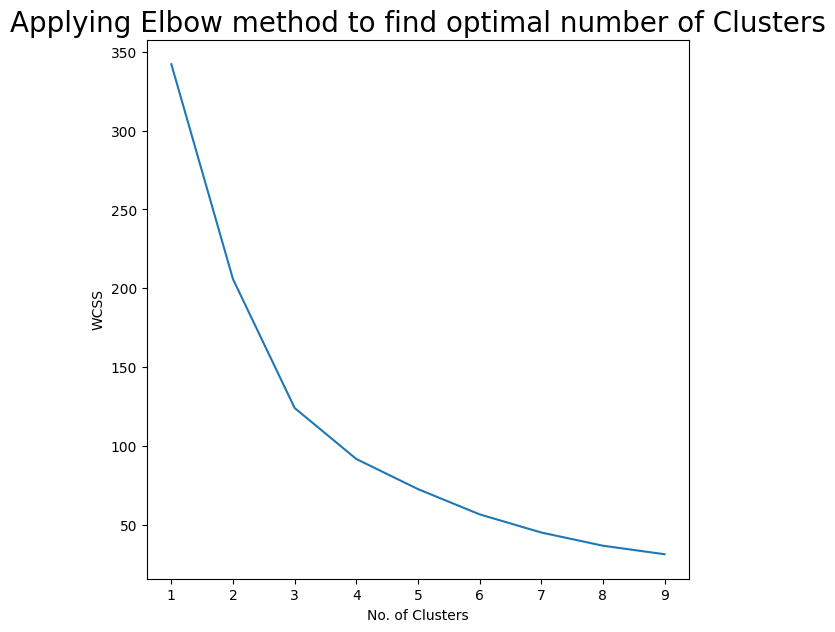

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


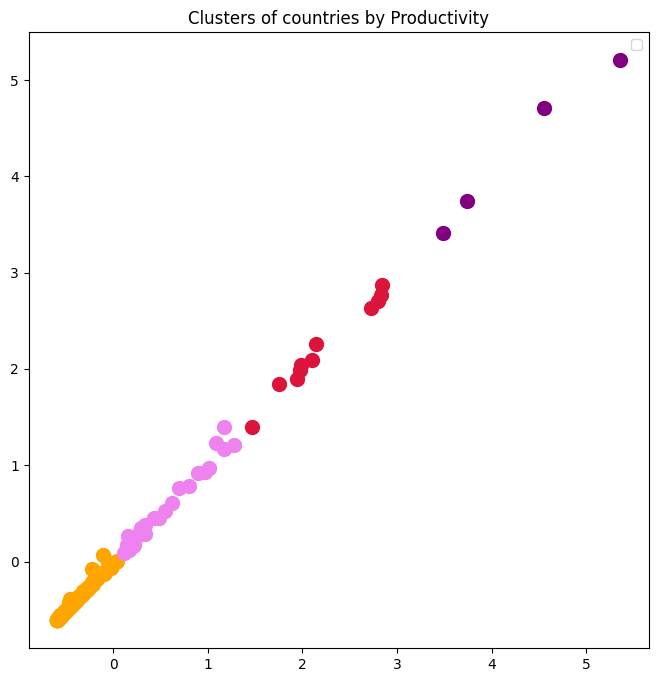

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


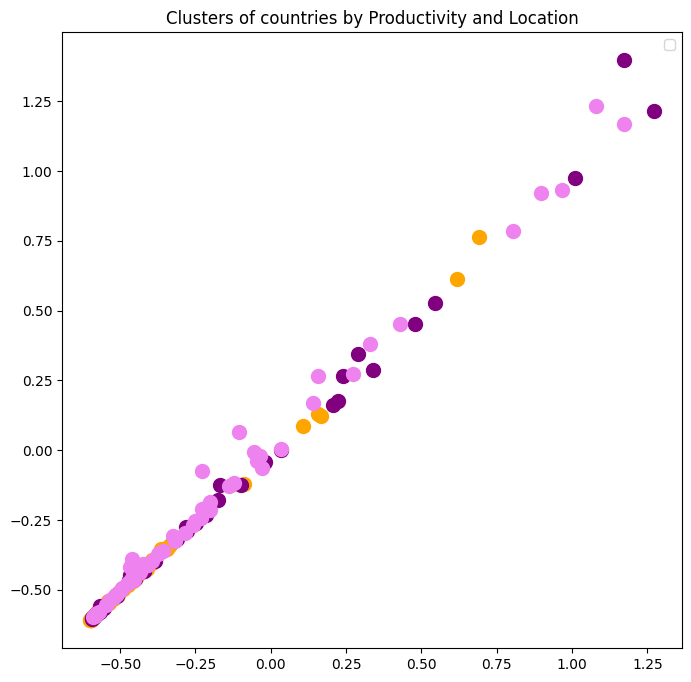

**************   CLUSTERED BY PRODUCTION   ******************
Cluster 0: Afghanistan, Albania, Angola, Antigua and Barbuda, Armenia, Austria, Azerbaijan, Bahamas, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bolivia, Bosnia and Herzegovina, Botswana, Brunei Darussalam, Bulgaria, Burkina Faso, Cabo Verde, Cambodia, Cameroon, Central African Republic, Chad, Chile, Congo, Costa Rica, Croatia, Cuba, Cyprus, Czechia, Côte d'Ivoire, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, El Salvador, Estonia, Eswatini, Fiji, Finland, French Polynesia, Gabon, Gambia, Georgia, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kong, Hungary, Iceland, Ireland, Israel, Jamaica, Jordan, Kiribati, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia, Lebanon, Lesotho, Liberia, Lithuania, Luxembourg, Macao, Madagascar, Malawi, Maldives, Mali, Malta, Mauritania, Mauritius, Mongolia, Montenegro, Mozambique, Namibia, New Caledonia, New Zealand, Nicaragua, Niger, 

In [ ]:
# Filter the data
area_geo = country_fao_food_filtered.groupby('Area')[['latitude', 'longitude']].mean().reset_index()
area_prod= country_fao_food_filtered.groupby('Area')[['Total_Production', 'Avg_Production']].mean().reset_index()
area_geo_prod = country_fao_food_filtered.groupby('Area')[['Total_Production', 'Avg_Production', 'latitude', 'longitude']].mean().reset_index()

# Create own dataframe for excluded countries
excluded_df = country_fao_food[country_fao_food['Area'].isin(to_exclude)].copy()

# Calculate mean and add to cluster 4
excluded_df_prod  = excluded_df.groupby('Area')[['Total_Production', 'Avg_Production']].mean().reset_index()
excluded_df_prod['Cluster'] = 4

excluded_df_geo = excluded_df.groupby('Area')[['latitude', 'longitude']].mean().reset_index()
excluded_df_geo['Cluster'] = 4

excluded_df_geo_prod = excluded_df.groupby('Area')[['Total_Production', 'Avg_Production','latitude', 'longitude']].mean().reset_index()
excluded_df_geo_prod['Cluster'] = 4


# Standardize the data
scaler_prod = StandardScaler()
scaler_geo  = StandardScaler()
scaler_geo_prod  = StandardScaler()

production_scaled_features = scaler_prod.fit_transform(area_prod[['Total_Production', 'Avg_Production']])
geo_scaled_features = scaler_geo.fit_transform(area_geo[['latitude', 'longitude']])
geo_prod_scaled_features = scaler_geo_prod.fit_transform(area_geo_prod[['Total_Production', 'Avg_Production','latitude', 'longitude']])




# Cluster
kmeans_g = KMeans(n_clusters=4, random_state=42)
kmeans_p = KMeans(n_clusters=4, random_state=42)
kmeans_g_p = KMeans(n_clusters=4, random_state=42)

kmeans_g.fit(geo_scaled_features)
kmeans_p.fit(production_scaled_features)
kmeans_g_p.fit(geo_prod_scaled_features)

area_geo['Cluster'] = kmeans_g.labels_
area_prod['Cluster'] = kmeans_p.labels_
area_geo_prod['Cluster'] = kmeans_g_p.labels_

# Calculate WCSS
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(geo_scaled_features)
  wcss.append(kmeans.inertia_)

# plotting the results
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, 10), wcss)
plt.title('Applying Elbow method to find optimal number of Clusters', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()




x= production_scaled_features
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(production_scaled_features)


# Plot the data

plt.rcParams['figure.figsize'] = (8, 8)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'violet')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'crimson')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink')


plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()


x=geo_prod_scaled_features
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(x)


# Plot the data

plt.rcParams['figure.figsize'] = (8, 8)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'violet')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'crimson')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink')

plt.title('Clusters of countries by Productivity and Location')
plt.legend()
plt.show()




area_prod = pd.concat([area_prod, excluded_df_prod], ignore_index=True)

clustered_countries_prod = area_prod.groupby('Cluster')['Area'].apply(lambda x: ', '.join(x)).reset_index()
print("**************   CLUSTERED BY PRODUCTION   ******************")
# Print each cluster and the countries in it
for index, row in clustered_countries_prod.iterrows():
    print(f"Cluster {row['Cluster']}: {row['Area']}")



area_geo = pd.concat([area_geo, excluded_df_geo], ignore_index=True)
clustered_countries_geo = area_geo.groupby('Cluster')['Area'].apply(lambda x: ', '.join(x)).reset_index()
print("**************   CLUSTERED BY LOCATION   ******************")
for index, row in clustered_countries_geo.iterrows():
    print(f"Cluster {row['Cluster']}: {row['Area']}")


area_geo_prod = pd.concat([area_geo_prod, excluded_df_geo_prod], ignore_index=True)

clustered_countries_geo_prod = area_geo_prod.groupby('Cluster')['Area'].apply(lambda x: ', '.join(x)).reset_index()
print("**************   CLUSTERED BY BOTH LOCATION AND PRODUCTION   ******************")
for index, row in clustered_countries_geo_prod.iterrows():
    print(f"Cluster {row['Cluster']}: {row['Area']}")

area_geo['Cluster'] = area_geo['Cluster'].astype(str) 
area_prod['Cluster'] = area_prod['Cluster'].astype(str) 
area_geo_prod['Cluster'] = area_geo_prod['Cluster'].astype(str) 

MEASURING IMPORTANCE OF CLUSTERING FEATURES

In [ ]:
# The methodology of measuring importances of features is taken from ChatGpt

features_prod = area_prod[['Total_Production', 'Avg_Production']]
clusters_prod = area_prod['Cluster']

features_geo = area_geo[['latitude', 'longitude']]
clusters_geo = area_geo['Cluster']

features_g_p = area_geo_prod[['Total_Production', 'Avg_Production','latitude', 'longitude']]
clusters_g_p = area_geo_prod['Cluster']

# Fit a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_prod, clusters_prod)

feature_importance = clf.feature_importances_

feature_importance_prod = pd.DataFrame({
    'Feature': features_prod.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
    
print(feature_importance_prod)



# Fit a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_geo, clusters_geo)

# Get feature importance
feature_importance = clf.feature_importances_

# Creating a DataFrame to view feature importances
feature_importance_geo = pd.DataFrame({
    'Feature': features_geo.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
    
print(feature_importance_geo)



# Fit a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_g_p, clusters_g_p)

# Get feature importance
feature_importance = clf.feature_importances_

# Creating a DataFrame to view feature importances
feature_importance_g_p = pd.DataFrame({
    'Feature': features_g_p.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
    
print(feature_importance_g_p)



            Feature  Importance
1    Avg_Production    0.633483
0  Total_Production    0.366517
     Feature  Importance
1  longitude    0.541625
0   latitude    0.458375
            Feature  Importance
2          latitude    0.363653
3         longitude    0.358381
0  Total_Production    0.231412
1    Avg_Production    0.046554


### Silhouette Score

In [ ]:
clusters_g_prod = kmeans.fit_predict(geo_prod_scaled_features)
silhouette_avg_g_prod = silhouette_score(geo_prod_scaled_features, clusters_g_prod)


print(f'Silhouette Score (Production only): {silhouette_avg_g_prod}')

clusters_prod = kmeans.fit_predict(production_scaled_features)
silhouette_avg_prod = silhouette_score(production_scaled_features, clusters_prod)

print(f'Silhouette Score (Production only): {silhouette_avg_prod}')


Silhouette Score (Production only): 0.3823061748718837
Silhouette Score (Production only): 0.7143609586951516


In [ ]:
# Sort the data by cluster 
area_geo = area_geo.sort_values('Cluster')

# Plot the data
fig = px.choropleth(
    area_geo,
    locations='Area',  # Column in DataFrame containing country names
    locationmode='country names',  # Set to recognize countries by names
    color='Cluster',  # Column giving the color intensity according to the cluster
    color_discrete_map={
        '0': '#636EFA',  # Color for cluster 0
        '1': '#EF553B',  # Color for cluster 1
        '2': '#00CC96',  # Color for cluster 2
        '3': '#AB63FA',  # Color for cluster 3
        '4': '#FFA15A'   # Color for cluster 4
    },
    hover_name='Area',  # Column to be displayed in the hover information
    color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
    labels={'Cluster':'Cluster'},  # Label for legend
    title='Global Clustering of Countries Based on Location '
)



fig.update_geos(projection_type="natural earth")  # You can change the projection type
fig.update_layout(legend_title='Cluster')
fig.show()


In [ ]:
# Sort the data by cluster 
area_prod = area_prod.sort_values('Cluster')

# Plot the clusters on a world map
fig = px.choropleth(
    area_prod,
    locations='Area',
    locationmode='country names',
    color='Cluster',
    hover_name='Area',
    hover_data=['Avg_Production'],
    color_discrete_map={
        '0': '#636EFA',
        '1': '#EF553B',
        '2': '#00CC96',
        '3': '#AB63FA',
        '4': '#FFA15A'
    },
    title='Global Clustering of Countries Based on Production '
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(legend_title='Cluster')
fig.show()


In [ ]:
# Plot the clusters on a world map
fig = px.choropleth(
    area_geo_prod,
    locations='Area',
    locationmode='country names',
    color='Cluster',
    hover_name='Area',
    hover_data=['Avg_Production'],
    color_discrete_map={
        '0': '#636EFA',
        '1': '#EF553B',
        '2': '#00CC96',
        '3': '#AB63FA',
        '4': '#FFA15A'
    },
    title='Global Clustering of Countries Based on Location and Production '
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(legend_title='Cluster')
fig.show()


CATEGORY PRODUCTIONS OF EACH CLUSTER

In [ ]:
# Get only food items
categorized_fao = fao_years_melted[fao_years_melted["Element"] == "Food"]

# Categorize
for category, items in fao_food_dict.items():
    categorized_fao.loc[categorized_fao['Item'].isin(items), 'Item'] = category

# Group by are item years and sum production
grouped_df = categorized_fao.groupby(['Area', 'Item', 'Years'])['Production'].sum().reset_index()

# Specify the last year of each range
bins = [1990, 1995, 2001, 2007, 2013]  
labels = ['1990-1995', '1996-2001', '2002-2007', '2008-2013']

# Use cut to assign each year to a bin
grouped_df['Interval'] = pd.cut(grouped_df['Years'], bins=bins, labels=labels, right=True)

# Group by 'Area', 'Item', and 'Interval' and sum the 'Production'
summary_df = grouped_df.groupby(['Area', 'Item', 'Interval'])['Production'].sum().reset_index()
summary_df = summary_df[summary_df['Item'] != 'Other']

summary_df_geo = summary_df.merge(area_geo[['Area', 'Cluster']], on='Area', how='left').sort_values('Cluster')
summary_df_geo_prod = summary_df.merge(area_geo_prod[['Area', 'Cluster']], on='Area', how='left').sort_values('Cluster')
summary_df_prod = summary_df.merge(area_prod[['Area', 'Cluster']], on='Area', how='left').sort_values('Cluster')

grouped_data = summary_df_geo.groupby(['Area', 'Item'])['Production'].sum().unstack()
grouped_data.fillna(0, inplace=True)



/tmp/ipykernel_382/2790882871.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:

color_map = {
    'Vegetables': '#1f77b4',   # Blue
    'Grains': '#ff7f0e',       # Orange
    'Fruits': '#2ca02c',       # Green
    'Dairy': '#d62728',        # Red
    'Animal_Prod': '#9467bd',  # Purple
    'Nuts': '#8c564b',         # Brown
    'Sugars': '#e377c2',       # Pink
    'Oils': '#7f7f7f'          # Gray
}
summary_df.reset_index(inplace=True)

# Plotting on a world map
fig = px.choropleth(
    summary_df_prod,
    locations='Area',
    locationmode='country names',
    color='Cluster',
    hover_name='Area',
    title='Global Clustering of Countries Based on Food Production Categories',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(legend_title='Cluster')
fig.show()


In [ ]:
# Exclude cluster 4
summary_df_prod_1 = summary_df_prod[summary_df_prod['Cluster']!="4"]

# Plot the graph
fig = px.scatter(
    summary_df_prod_1, 
    x='Cluster',  # Countries on the x-axis
    y='Interval',  # Production intervals on the y-axis
    size='Production',  # Size of the circles based on production
    size_max = 200,

    color='Item',  # Coloring by item categories
    color_discrete_map=color_map,
    
    hover_name='Cluster',  # Hover shows the area name
    labels={
        'Area': 'Country',
        'Production': 'Production',
        'Item': 'Item Category',
        'Interval': 'Production Interval'
    }
)

fig.update_layout(
    title='Production by Country Across Different Time Intervals',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    xaxis=dict(title='Cluster'),
    yaxis=dict(title='Production Interval', categoryorder='total ascending'),  # Ensuring the intervals are sorted
    height=800,  # Increasing the height of the plot
    legend_title_text='Item Category'
)

fig.show()
print("**************   CLUSTERED BY PRODUCTION   ******************")
for index, row in clustered_countries_prod.iterrows():
    print(f"Cluster {row['Cluster']}: {row['Area']}")


**************   CLUSTERED BY PRODUCTION   ******************
Cluster 0: Afghanistan, Albania, Angola, Antigua and Barbuda, Armenia, Austria, Azerbaijan, Bahamas, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bolivia, Bosnia and Herzegovina, Botswana, Brunei Darussalam, Bulgaria, Burkina Faso, Cabo Verde, Cambodia, Cameroon, Central African Republic, Chad, Chile, Congo, Costa Rica, Croatia, Cuba, Cyprus, Czechia, Côte d'Ivoire, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, El Salvador, Estonia, Eswatini, Fiji, Finland, French Polynesia, Gabon, Gambia, Georgia, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kong, Hungary, Iceland, Ireland, Israel, Jamaica, Jordan, Kiribati, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia, Lebanon, Lesotho, Liberia, Lithuania, Luxembourg, Macao, Madagascar, Malawi, Maldives, Mali, Malta, Mauritania, Mauritius, Mongolia, Montenegro, Mozambique, Namibia, New Caledonia, New Zealand, Nicaragua, Niger, 

In [ ]:
# Get cluster 4
summary_df_prod_2 = summary_df_prod[summary_df_prod['Cluster'] =="4"]

# Plot the graph
fig = px.scatter(
    summary_df_prod_2,
    y='Interval',  # Production intervals on the y-axis
    x='Area',
    size='Production',  # Size of the circles based on production
    size_max = 200,

    color='Item',  # Coloring by item categories
    color_discrete_map=color_map,
    
    hover_name='Area',  # Hover shows the area name
    labels={
        'Area': 'Country',
        'Production': 'Production',
        'Item': 'Item Category',
        'Interval': 'Production Interval'
    }
)

fig.update_layout(
    title='Production by Country Across Different Time Intervals',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    xaxis=dict(title='Cluster'),
    yaxis=dict(title='Production Interval', categoryorder='total ascending'),  # Ensuring the intervals are sorted
    height=800,  # Increasing the height of the plot
    legend_title_text='Item Category'
)

fig.show()
print("**************   CLUSTERED BY PRODUCTION   ******************")
for index, row in clustered_countries_prod.iterrows():
    print(f"Cluster {row['Cluster']}: {row['Area']}")


**************   CLUSTERED BY PRODUCTION   ******************
Cluster 0: Afghanistan, Albania, Angola, Antigua and Barbuda, Armenia, Austria, Azerbaijan, Bahamas, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bolivia, Bosnia and Herzegovina, Botswana, Brunei Darussalam, Bulgaria, Burkina Faso, Cabo Verde, Cambodia, Cameroon, Central African Republic, Chad, Chile, Congo, Costa Rica, Croatia, Cuba, Cyprus, Czechia, Côte d'Ivoire, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, El Salvador, Estonia, Eswatini, Fiji, Finland, French Polynesia, Gabon, Gambia, Georgia, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kong, Hungary, Iceland, Ireland, Israel, Jamaica, Jordan, Kiribati, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia, Lebanon, Lesotho, Liberia, Lithuania, Luxembourg, Macao, Madagascar, Malawi, Maldives, Mali, Malta, Mauritania, Mauritius, Mongolia, Montenegro, Mozambique, Namibia, New Caledonia, New Zealand, Nicaragua, Niger, 

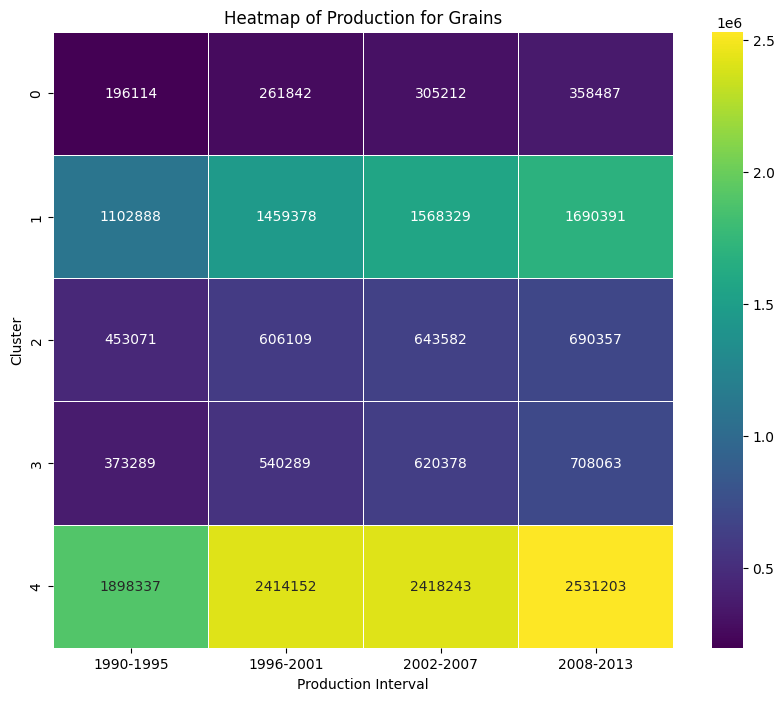

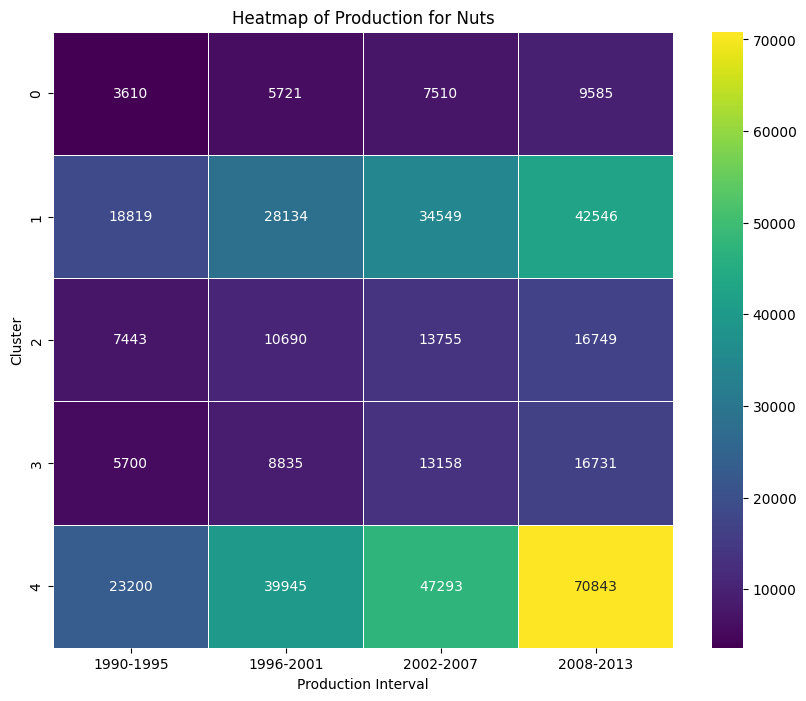

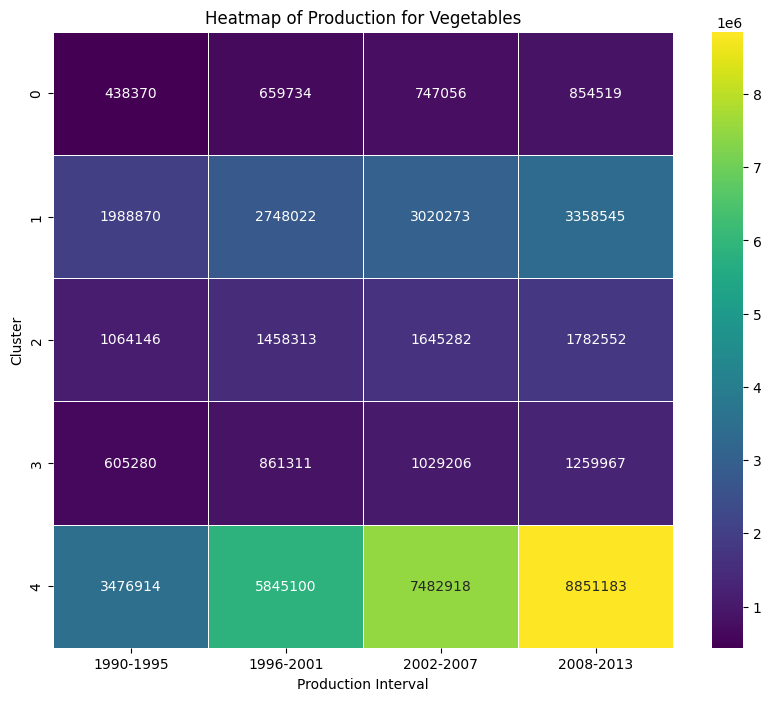

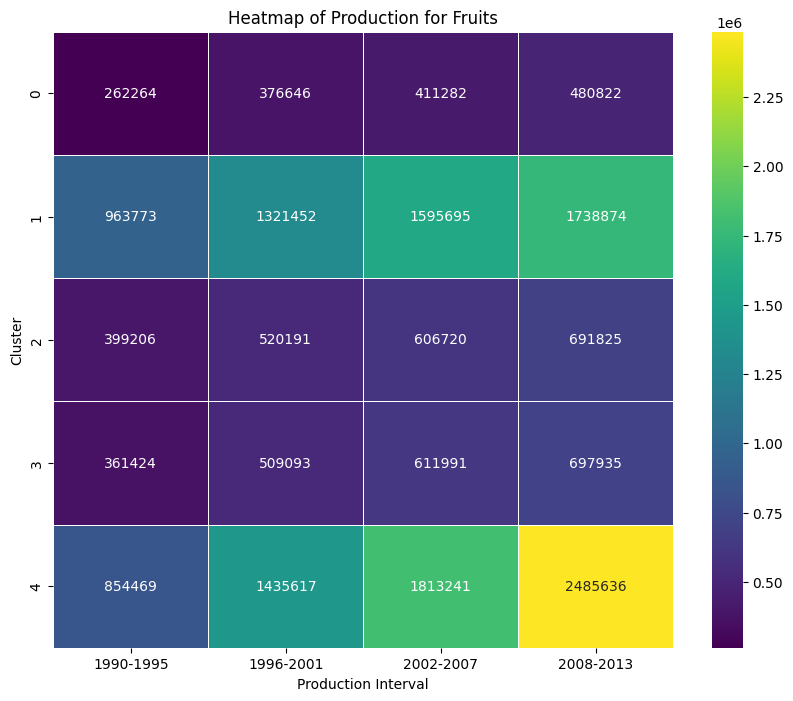

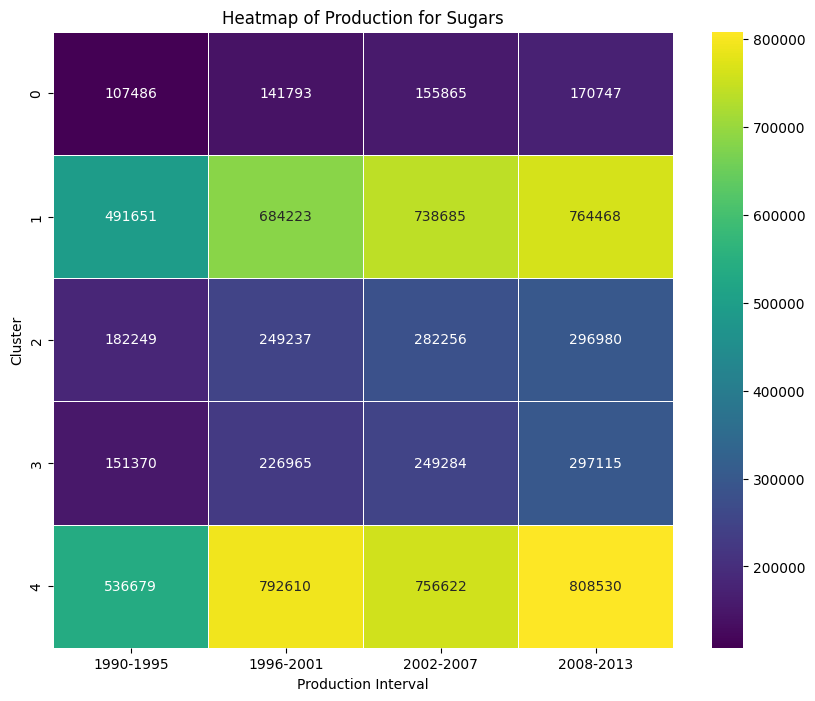

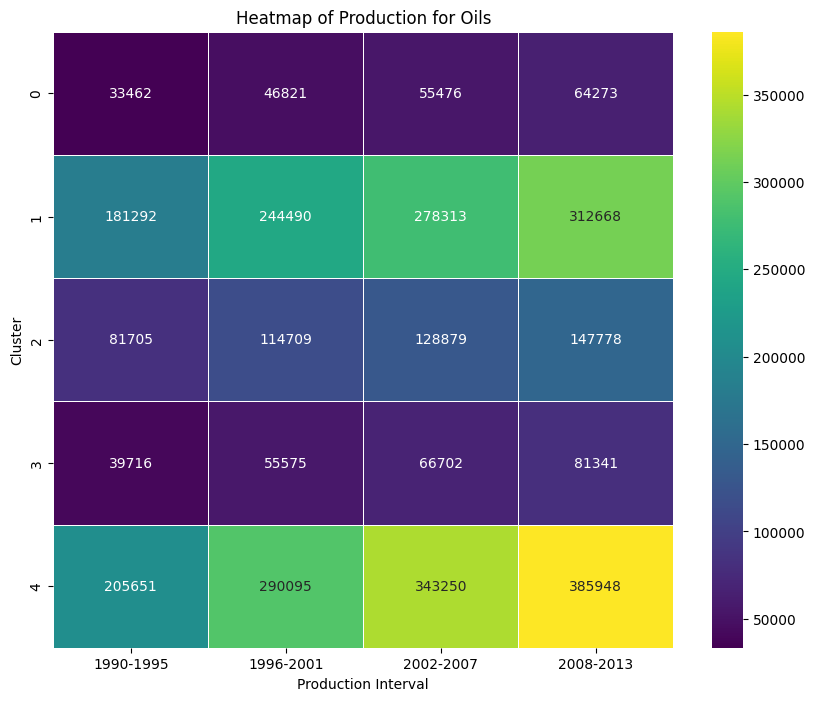

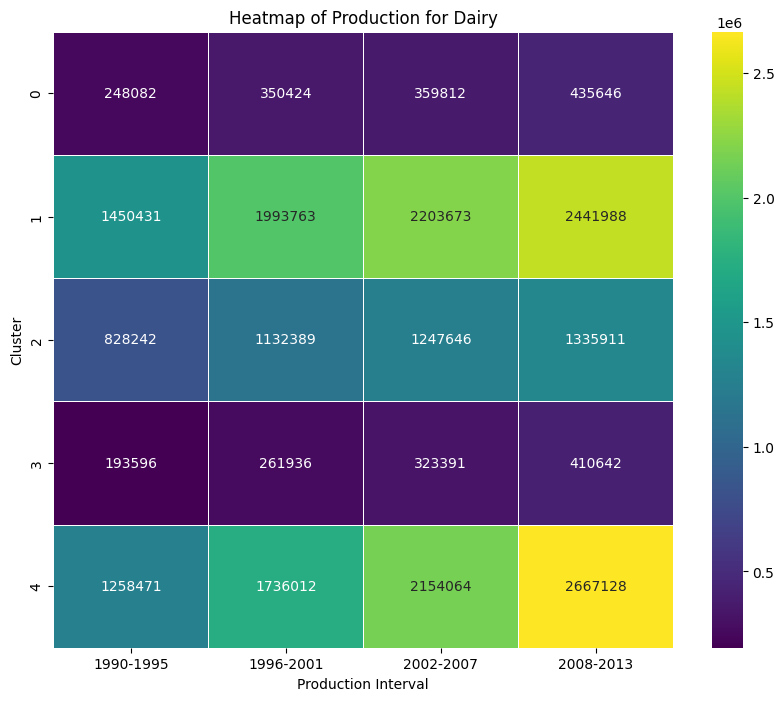

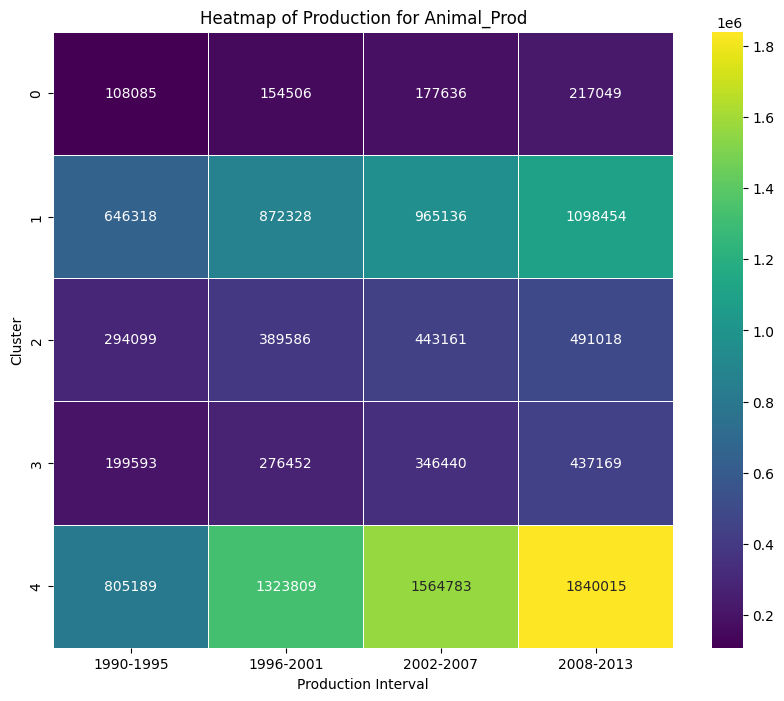

No data available for category Other.


In [ ]:
# Drop cluster
summary_df_geo_prod = summary_df_geo_prod.dropna(subset=['Cluster'])

# Convert Cluster to int type for better handling in plots
summary_df_geo_prod['Cluster'] = summary_df_geo_prod['Cluster'].astype(int)

# Initiate categories
categories = ['Grains', 'Nuts', 'Vegetables', 'Fruits', 'Sugars', 'Oils', 'Dairy', 'Animal_Prod', 'Other']

# Loop each category and categorize data and plot heat map for each category
for category in categories:
    cat_data = summary_df_geo_prod[summary_df_geo_prod['Item'] == category]
    if not cat_data.empty:
        pivot_table = cat_data.pivot_table(index='Cluster', columns='Interval', values='Production', aggfunc='sum')
        if pivot_table.empty:
            print(f"No data available for category {category}.")
        else:
            plt.figure(figsize=(10, 8))
            sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
            plt.title(f"Heatmap of Production for {category}")
            plt.ylabel('Cluster')
            plt.xlabel('Production Interval')
            plt.show()
    else:
        print(f"No data available for category {category}.")


### EMISSION ANALYSIS BY EACH CATEGORY

In [ ]:
# Copy dataframe and get only food
categorized_df = fao.copy()
categorized_df = categorized_df[categorized_df['Element'] == 'Food']

# Categorize data
for category, items in fao_food_dict.items():
    categorized_df.loc[categorized_df['Item'].isin(items), 'Item'] = category

# Drio unneccesary data columns
grouped_df = categorized_df.groupby(['Area', 'Item']).sum().iloc[:, 10:].reset_index()


In [ ]:
grouped_df

Area         Item   Y1963   Y1964   Y1965   Y1966   Y1967  \
0     Afghanistan  Animal_Prod   187.0   193.0   202.0   233.0   247.0   
1     Afghanistan        Dairy  1206.0  1235.0  1354.0  1404.0  1520.0   
2     Afghanistan       Fruits   715.0   914.0   950.0   924.0  1119.0   
3     Afghanistan       Grains  2514.0  2843.0  2895.0  2675.0  2986.0   
4     Afghanistan         Nuts     1.0     1.0     2.0     2.0     1.0   
...           ...          ...     ...     ...     ...     ...     ...   
1561     Zimbabwe         Nuts    41.0    41.0    41.0    42.0    45.0   
1562     Zimbabwe         Oils    18.0    18.0    23.0    22.0    30.0   
1563     Zimbabwe        Other  1403.0  1435.0  1466.0  1589.0  1643.0   
1564     Zimbabwe       Sugars   106.0   106.0   130.0   141.0   163.0   
1565     Zimbabwe   Vegetables   272.0   275.0   280.0   277.0   296.0   

       Y1968   Y1969   Y1970  ...   Y2004   Y2005   Y2006   Y2007   Y2008  \
0      266.0   269.0   252.0  ...   408.0   437.0   367.0   378.0   436.0   
1     1590.0  1606.0  1394.0  ...  3334.0  3213.0  3065.0  3278.0  3215.0   
2     1170.0  1188.0  1125.0  ...  1038.0  1084.0  1141.0  1066.0  1006.0   
3     2979.0  3102.0  2675.0  ...  4101.0  4063.0  4388.0  4753.0  4894.0   
4        1.0     0.0     3.0  ...    11.0    13.0    24.0    34.0    42.0   
...      ...     ...     ...  ...     ...     ...     ...     ...     ...   
1561    45.0    50.0    56.0  ...    50.0    50.0    50.0    52.0    41.0   
1562    28.0    26.0    45.0  ...   244.0   252.0   249.0   253.0   292.0   
1563  1724.0  1700.0  1855.0  ...  2926.0  2947.0  3096.0  3222.0  3266.0   
1564   162.0   172.0   180.0  ...   670.0   626.0   678.0   604.0   570.0   
1565   302.0   312.0   320.0  ...   768.0   805.0   893.0   826.0   764.0   

       Y2009   Y2010   Y2011  Y2012  Y2013  
0      438.0   475.0   514.0    477    514  
1     3291.0  3407.0  3388.0   3829   3856  
2     1146.0  1440.0  1525.0   2004   2081  
3     5097.0  5203.0  5346.0   5404   5494  
4       28.0    66.0    71.0     70     44  
...      ...     ...     ...    ...    ...  
1561    38.0    36.0    30.0     32     31  
1562   296.0   300.0   314.0    335    336  
1563  3436.0  3485.0  3577.0   3650   3556  
1564   575.0   629.0   672.0    792    832  
1565   874.0   946.0   973.0    997   1006  

[1566 rows x 53 columns]

In [ ]:
# Initiate dataframe and get values
emissions_df = food_production.copy()
emissions_df = emissions_df[['Food product', 'Total_emissions']]

# Add category column
for category, items in food_categories.items():
    emissions_df.loc[emissions_df['Food product'].isin(items), 'Category'] = category

# Change name to fit mapping
emissions_df["Food product"] = emissions_df["Food product"].replace(mapping_dict)

# Count the total production per years
years = [f'Y{year}' for year in range(2004, 2014)]
production = fao[fao['Element'] == 'Food'].copy()
production = production.groupby('Item')[years].sum().reset_index()

# Merge dataframes
emissions_df = pd.merge(emissions_df, production, left_on='Food product', right_on='Item')

# Calculate average emissions yearly
emissions_df[years] = emissions_df[years].multiply(emissions_df['Total_emissions'], axis=0)    
emissions_df['Greenhouse emmisions(1000 Kg CO2)'] = emissions_df[years].sum(axis=1) / len(years)

# Get only necessary columns
emissions_df = emissions_df[['Food product', 'Greenhouse emmisions(1000 Kg CO2)', 'Total_emissions', 'Category']]

# rename total emissions and sort
emissions_df = emissions_df.rename(columns={'Total_emissions': 'Greenhouse emmisions(Kg CO2 - equivalents per kg product)'})
emissions_df["Food product"] = emissions_df['Food product'] + " : (" + emissions_df['Category'] + ")"
total_emissions_df = emissions_df.sort_values(["Category", "Greenhouse emmisions(Kg CO2 - equivalents per kg product)"], ascending=False)
avarage_emissions_df = emissions_df.sort_values(["Category", "Greenhouse emmisions(1000 Kg CO2)"], ascending=False)

# ChatGPT used to make the plots

# Get highest of each category and sort
max_total_emissions_df = emissions_df.loc[emissions_df.groupby('Category')['Greenhouse emmisions(Kg CO2 - equivalents per kg product)'].idxmax()].sort_values('Greenhouse emmisions(Kg CO2 - equivalents per kg product)', ascending=False)

# Create the bar chart
fig = px.bar(max_total_emissions_df, 
             x='Greenhouse emmisions(Kg CO2 - equivalents per kg product)', 
             y='Food product', 
             orientation='h', 
             title='Highest Total Emissions by Food Product from each Category',
             labels={'highest_total_emissions':'Highest Total Emissions', 'Food product':'Food Product'})


# Show the plot
fig.show()

# Get highest of each category and sort
max_avarage_emissions_df = emissions_df.loc[emissions_df.groupby('Category')['Greenhouse emmisions(1000 Kg CO2)'].idxmax()].sort_values(by='Greenhouse emmisions(1000 Kg CO2)', ascending=False)

# Create the bar chart
fig = px.bar(max_avarage_emissions_df, 
             x='Greenhouse emmisions(1000 Kg CO2)', 
             y='Food product', 
             orientation='h', 
             title='Highest Average Emissions Yearly by Food Product from each Category',
             labels={'avarage_emission_yearly':'Average Emissions Yearly', 'Food product':'Food Product'})

# Show the plot
fig.show()



fig = px.bar(avarage_emissions_df, 
             x='Greenhouse emmisions(1000 Kg CO2)', 
             y='Category', 
             color='Food product', 
             orientation='h', 
             title='Average Emissions Yearly by Food Product and Category',
             labels={'avarage_emission_yearly':'Average Emissions Yearly', 'Category':'Category'})

# Update layout for better readability
fig.update_layout(
    barmode='stack',
    height=1000,  # Increase height to fit all categories
    margin=dict(l=150),  # Increase left margin to avoid clipping of category names
    yaxis=dict(
        tickfont=dict(size=10)  # Adjust font size for y-axis labels
    )
)

# Show the plot
fig.show()


fig = px.bar(total_emissions_df, 
             x='Greenhouse emmisions(Kg CO2 - equivalents per kg product)', 
             y='Category', 
             color='Food product', 
             orientation='h', 
             title='Total Emissions by Food Product and Category',
             labels={'Total_emissions':'Total Emissions', 'Category':'Category'})

# Update layout for better readability
fig.update_layout(
    barmode='stack',
    height=1000,  # Increase height to fit all categories
    margin=dict(l=150),  # Increase left margin to avoid clipping of category names
    yaxis=dict(
        tickfont=dict(size=10)  # Adjust font size for y-axis labels
    )
)
# Show the plot
fig.show()

# Create subplots with shared y-axis
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Total Emissions",
        "Average Emissions Produced in a Year"
    ),
    horizontal_spacing=0.1  # Increase horizontal spacing between subplots
)

# Add total emissions bar plot to the left subplot
total_emissions_bar = px.bar(
    total_emissions_df,
    x='Greenhouse emmisions(Kg CO2 - equivalents per kg product)',
    y='Category',
    color='Food product',
    orientation='h'
)

for trace in total_emissions_bar['data']:
    trace['showlegend'] = True
    trace['legendgroup'] = 'group1'  # Assigning legend group for total emissions
    fig.add_trace(trace, row=1, col=1)

fig.update_xaxes(type='log', row=1, col=1)

# Add average emissions bar plot to the right subplot
average_emissions_bar = px.bar(
    avarage_emissions_df,
    x='Greenhouse emmisions(1000 Kg CO2)',
    y='Category',
    color='Food product',
    orientation='h'
)

for trace in average_emissions_bar['data']:
    trace['showlegend'] = False  # Disable legend for individual traces in average emissions plot
    trace['legendgroup'] = 'group1'  # Assigning legend group for average emissions
    fig.add_trace(trace, row=1, col=2)

# Adjust to log scale
fig.update_xaxes(type='log', row=1, col=2)

# Update layout for better readability and appearance
fig.update_layout(
    height=1000,
    width=1500,  # Increase width of the entire figure
    title_text='Emissions by Food Product and Category',
    title_x=0.5,
    margin=dict(l=150),
    yaxis=dict(
        tickfont=dict(size=10)  # Adjust font size for y-axis labels
    ),
    legend=dict(
        x=1.05,
        y=0.5,
        traceorder='normal',
        font=dict(
            size=10,
        ),
        orientation='v',
        xanchor='left',
        yanchor='middle'
    )
)

# Specific layout adjustments for stacking bars
fig.update_layout(
    barmode='stack',  # Stack bars
    xaxis_title='Total Emissions (Kg CO2 - equivalents per kg product)',
    xaxis2_title='Average Emissions Yearly (1000 Kg CO2)',
    showlegend=True
)


# Show the combined plot
fig.show()

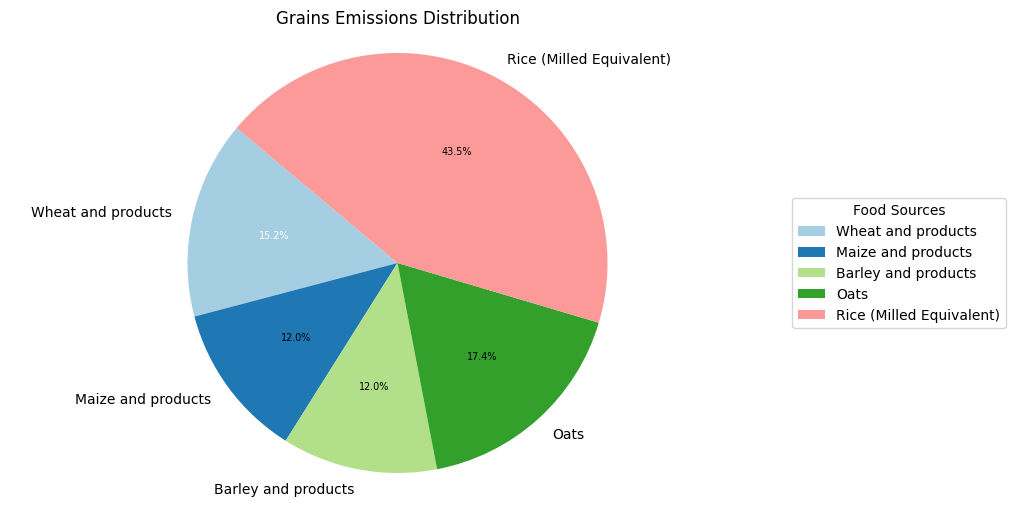

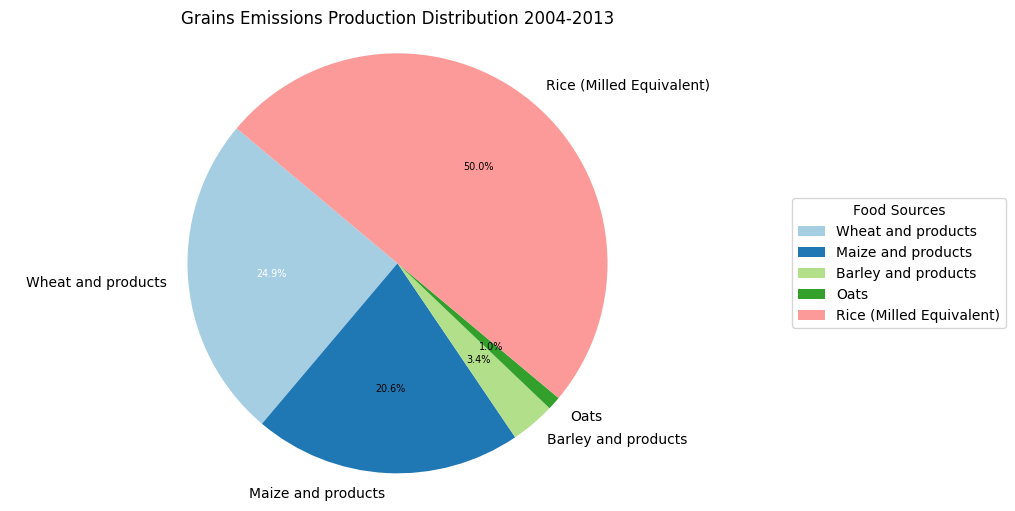

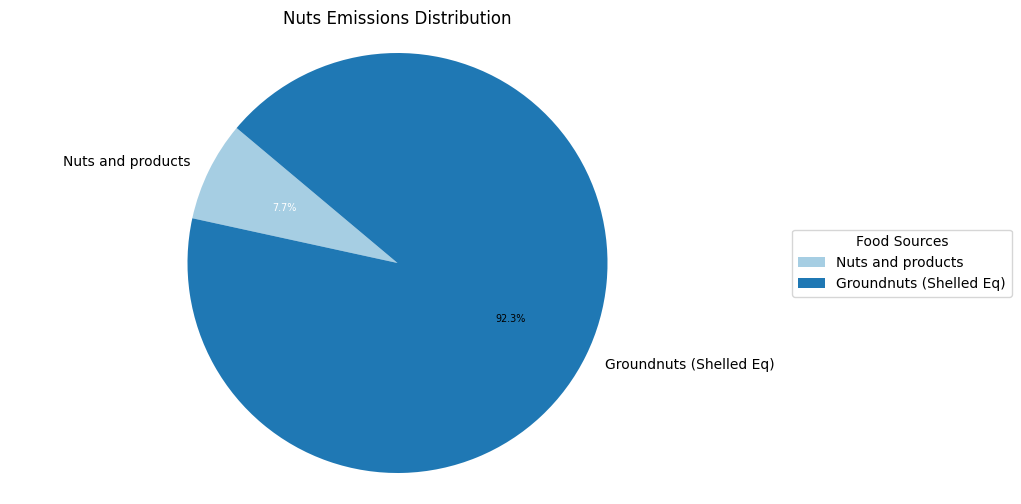

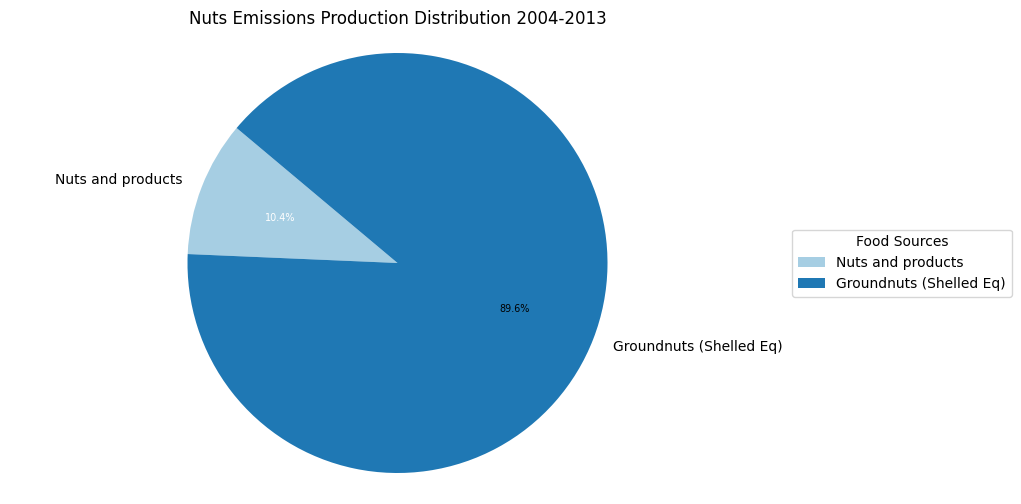

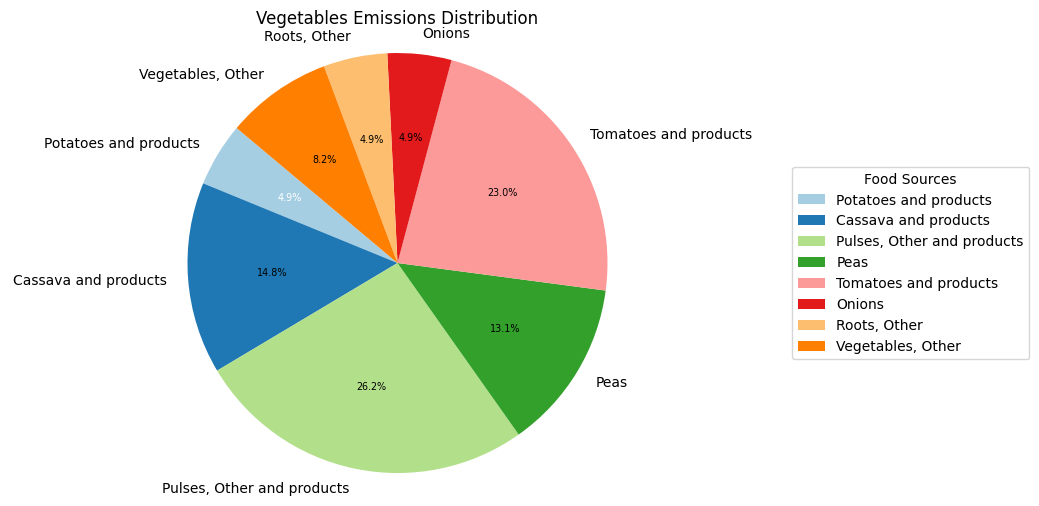

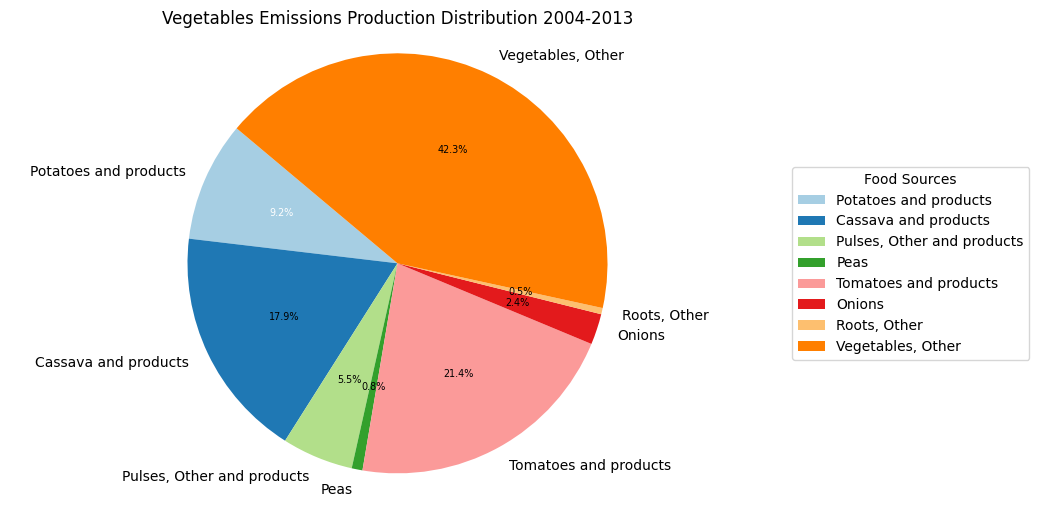

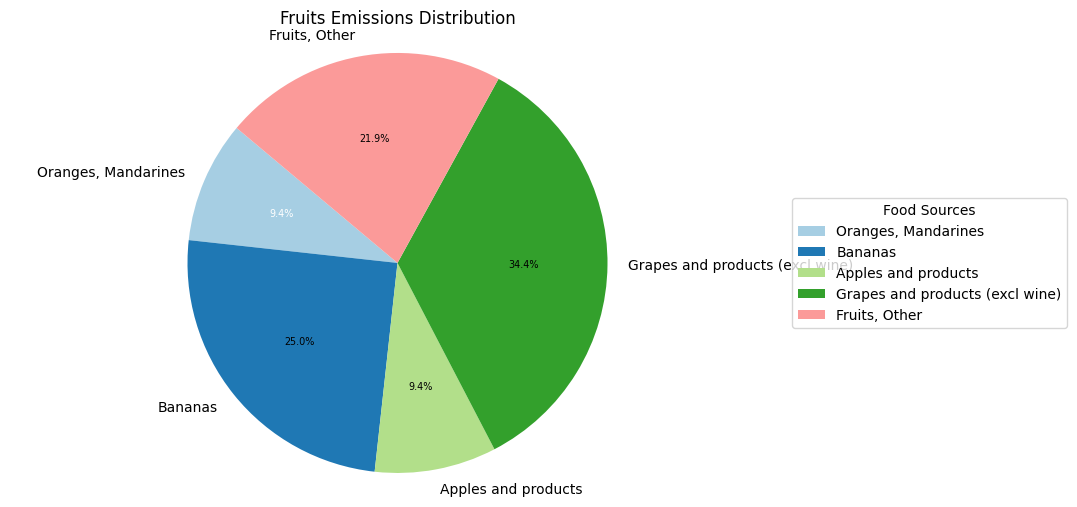

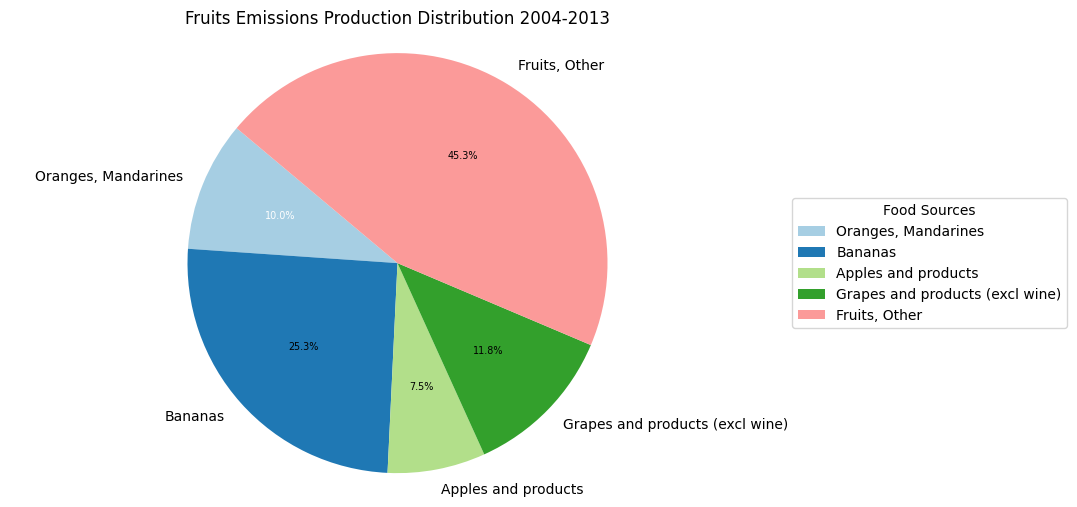

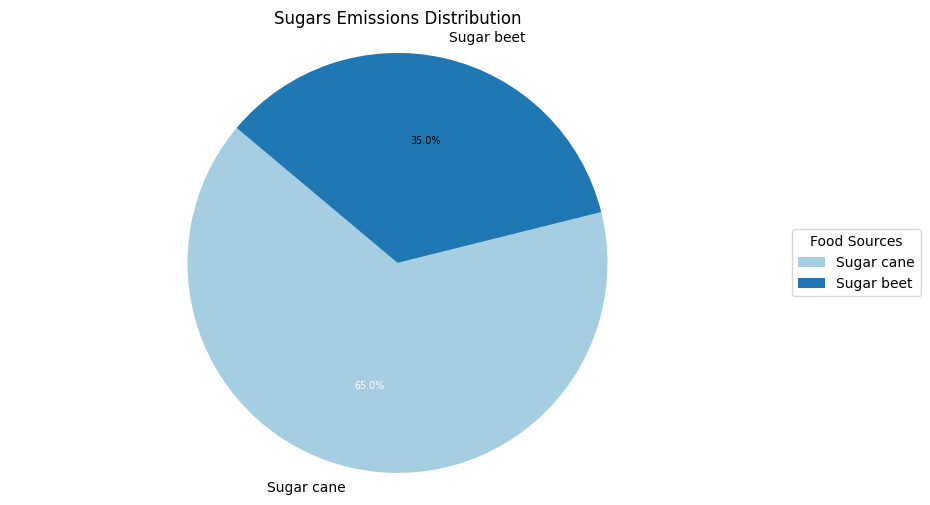

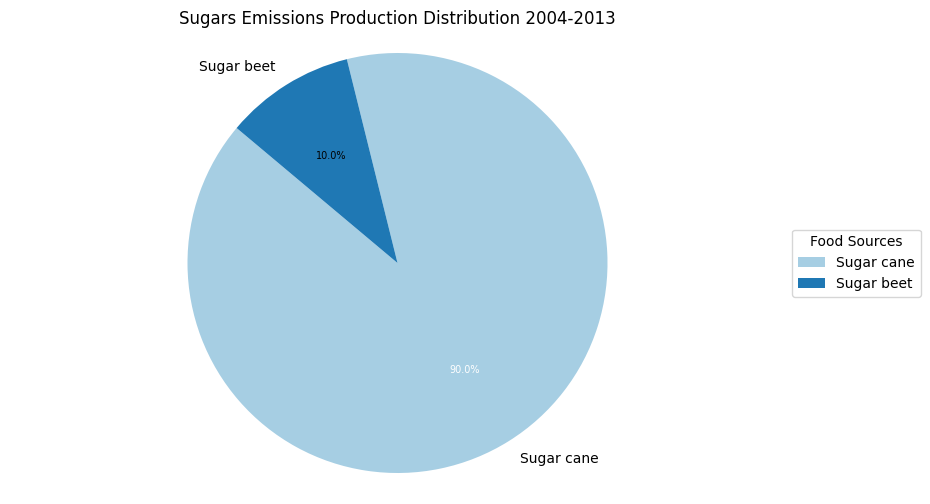

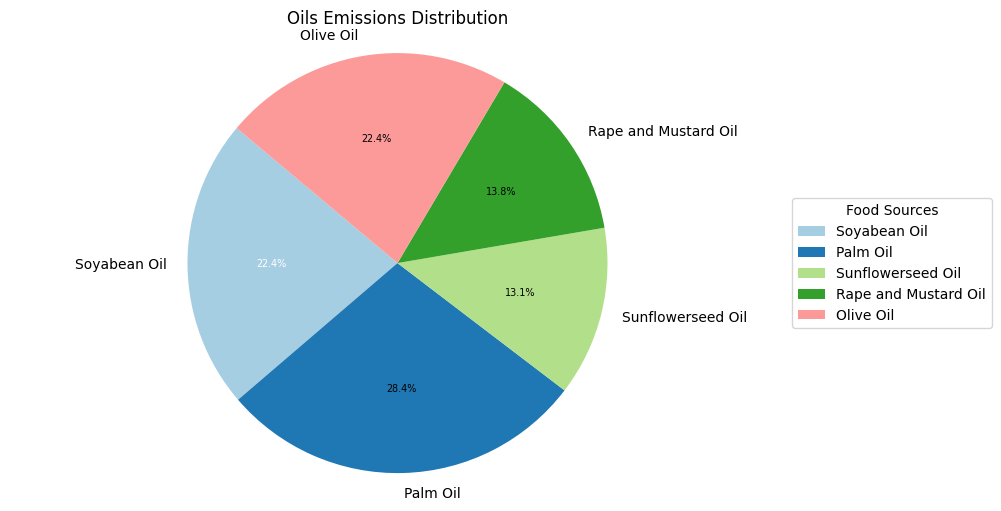

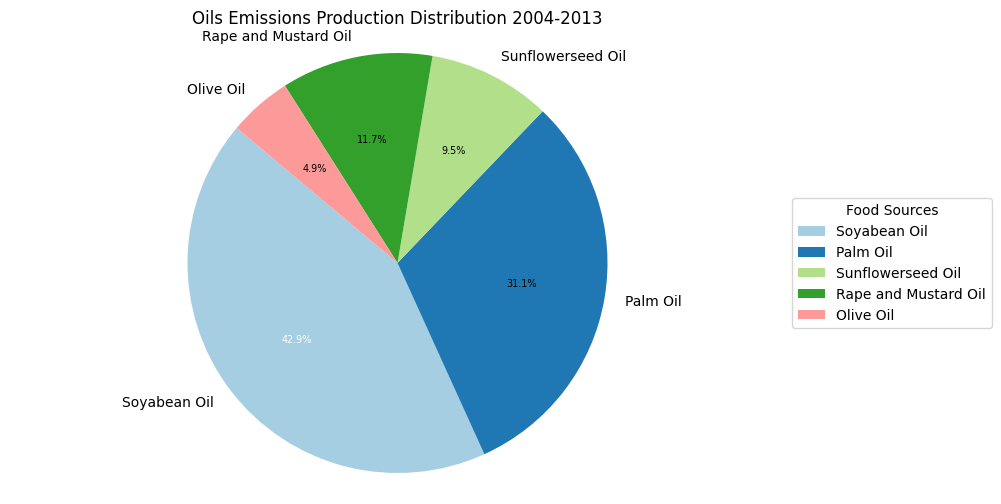

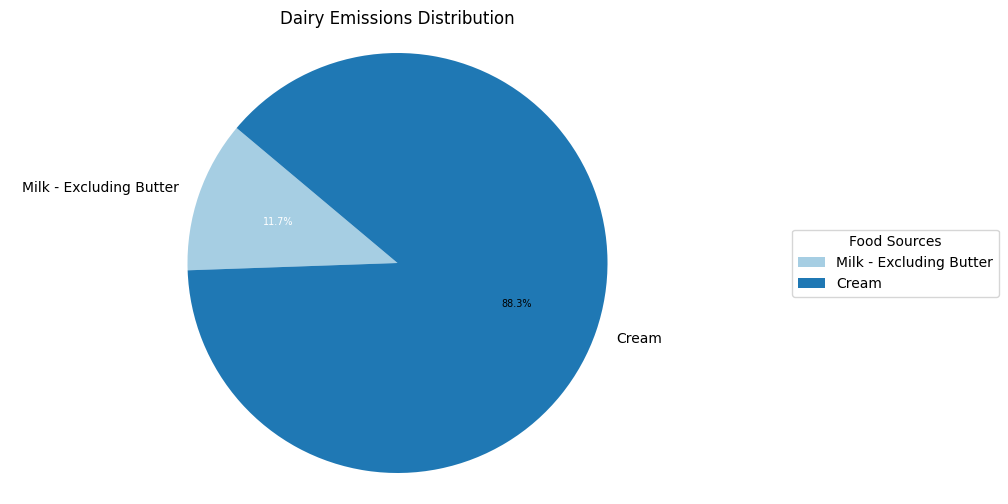

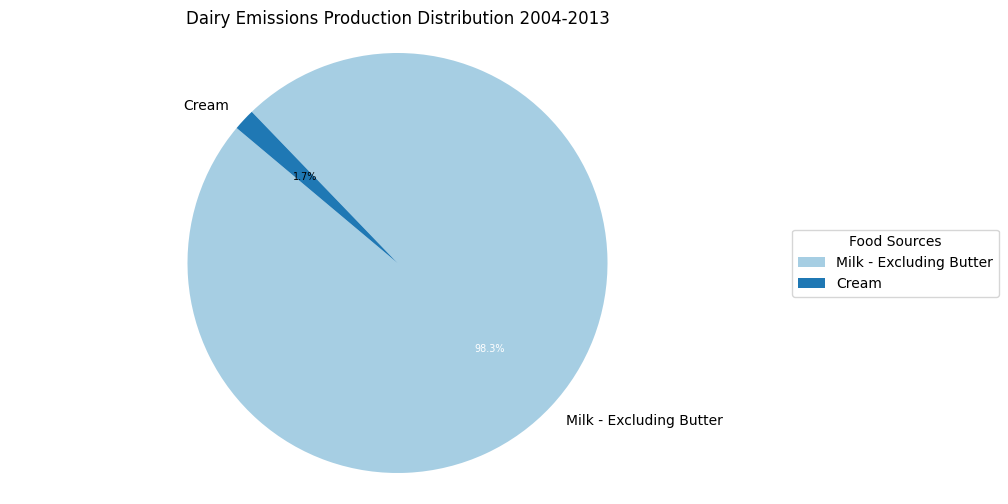

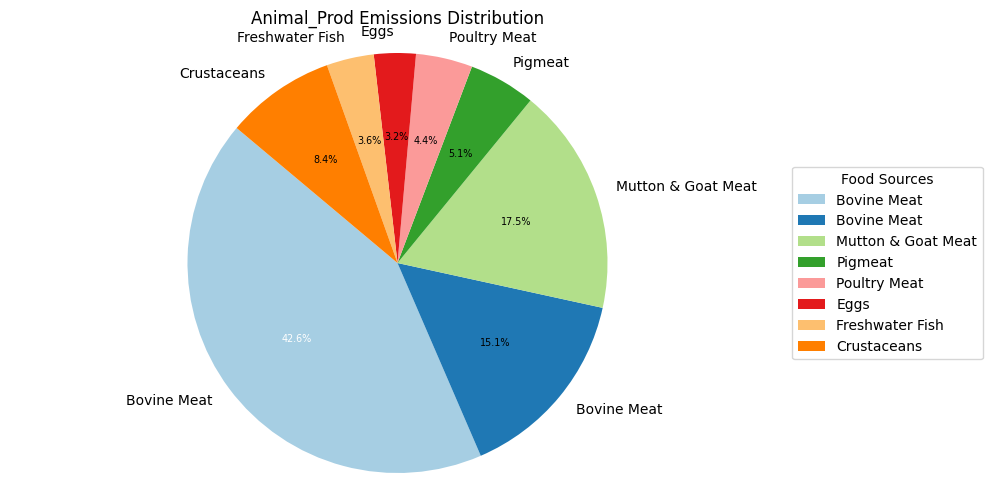

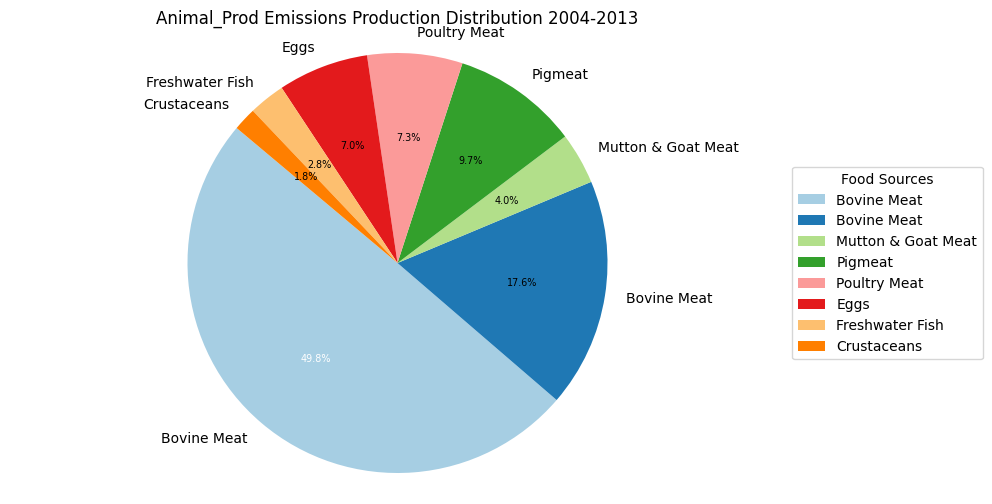

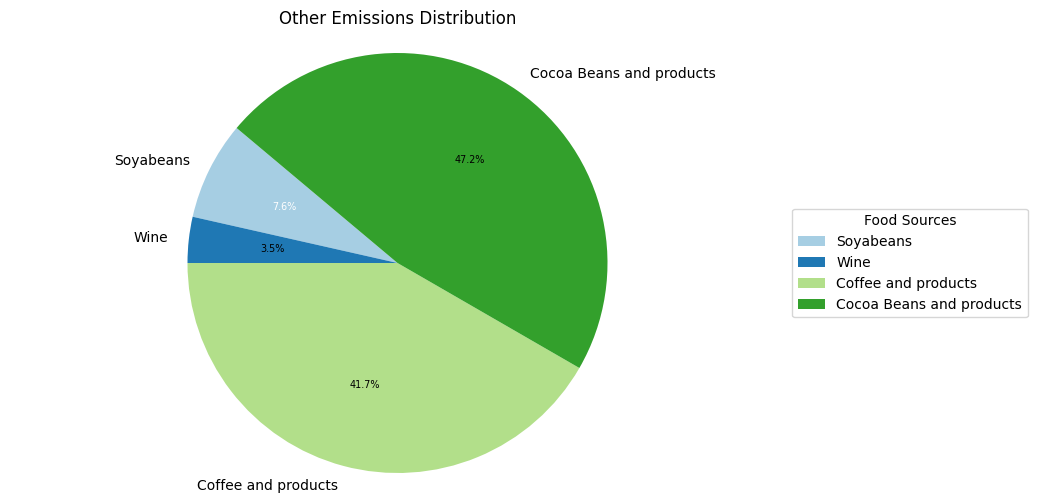

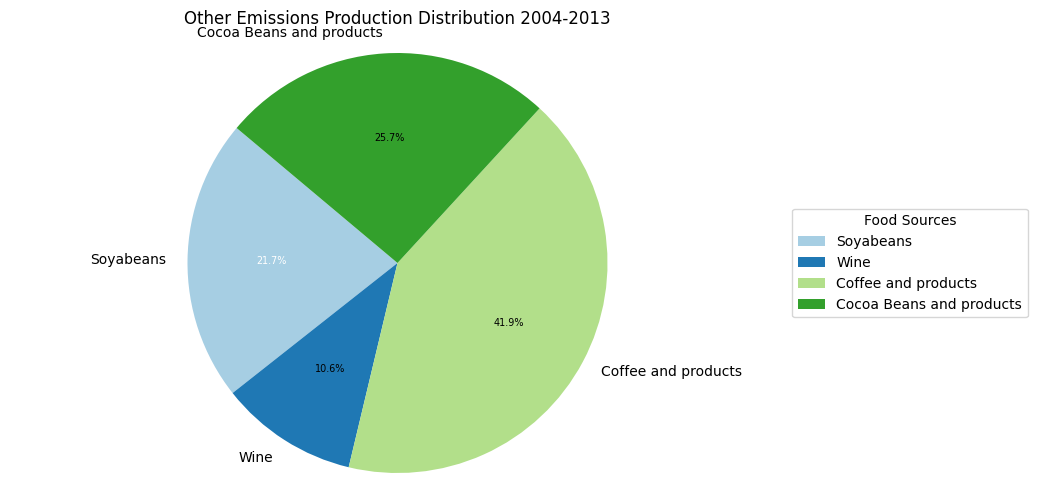

In [ ]:
# Initiate big dataframe

# Here we create pie charts for where does the emissions come from in different categories
for category, items in food_categories.items():
    # Get only food items in the category and get necessary columns only
    category_df = food_production[food_production['Food product'].isin(items)].copy()
    category_df = category_df[['Food product', 'Total_emissions']]

    # Calculate emission ratio
    category_df['emission_ratio'] = category_df['Total_emissions'] / category_df['Total_emissions'].sum() * 100

    # Change name of food procut to merge dataframes
    category_df["Food product"] = category_df["Food product"].replace(mapping_dict)

    # Initiate years and group by and sum production
    years = [f'Y{year}' for year in range(2004, 2014)]
    production = fao.groupby('Item')[years].sum().reset_index()

    # Merge dataframes
    category_df = pd.merge(category_df, production, left_on='Food product', right_on='Item')

    # get only necessary columns
    category_df = category_df[['Food product', 'Total_emissions', 'emission_ratio'] + years]

    # Calculate emissions produces and avarage
    category_df[years] = category_df[years].multiply(category_df['Total_emissions'], axis=0)    
    category_df['avarage_emission_yearly'] = category_df[years].sum(axis=1) / len(years)
    category_df['produced_emission_ratio'] = category_df['avarage_emission_yearly'] / category_df['Total_emissions'].sum() * 100
    
# ChatGPT used to make the plots


    # Pie chart 1
    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(
        category_df['emission_ratio'], 
        labels=category_df['Food product'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )

    plt.title(f'{category} Emissions Distribution')
    plt.axis('equal')

    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')

    plt.legend(wedges, category_df['Food product'],
            title="Food Sources",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()

    # Pie chart 2
    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(
        category_df['produced_emission_ratio'], 
        labels=category_df['Food product'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )

    plt.title(f'{category} Emissions Production Distribution 2004-2013')
    plt.axis('equal')

    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')

    plt.legend(wedges, category_df['Food product'],
            title="Food Sources",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()


/tmp/ipykernel_382/4089411325.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




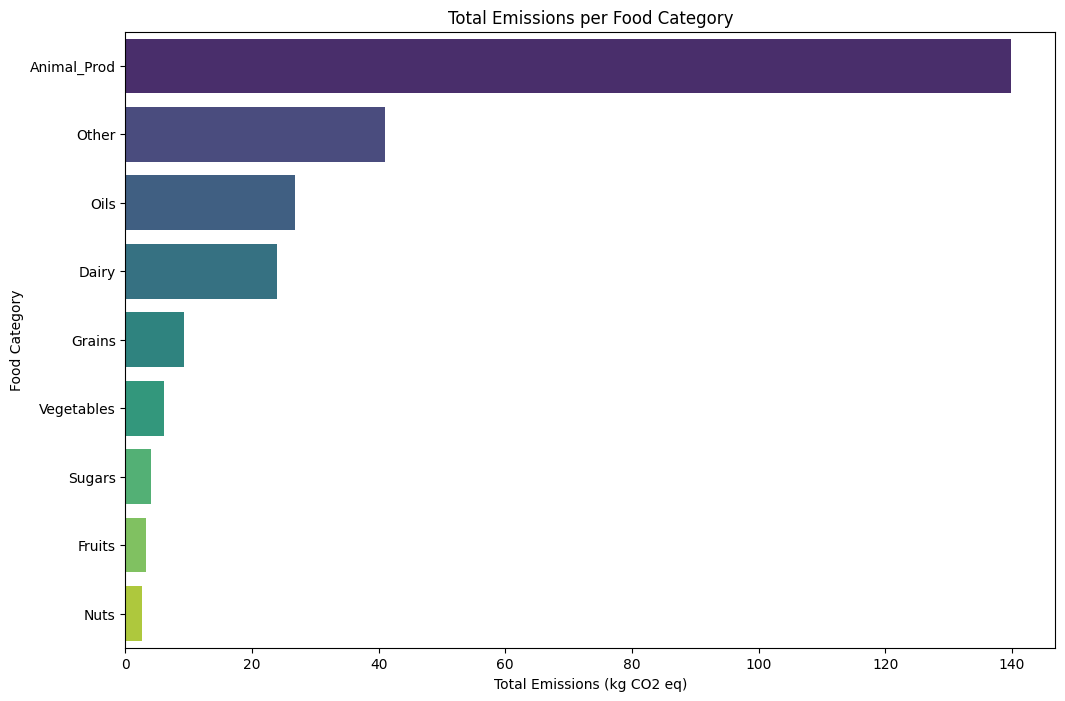

In [ ]:
#total emissions per food catagory 

# Load data
food_production_data = pd.read_csv('Food_Production.csv')


# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Aggregate emissions by category
category_emissions = food_production_data.groupby('Category')['Total_emissions'].sum().reset_index()

# Sort values for better visualization
category_emissions = category_emissions.sort_values(by='Total_emissions', ascending=False)

# Plot total emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_emissions, x='Total_emissions', y='Category', palette='viridis')
plt.title('Total Emissions per Food Category')
plt.xlabel('Total Emissions (kg CO2 eq)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/542719248.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




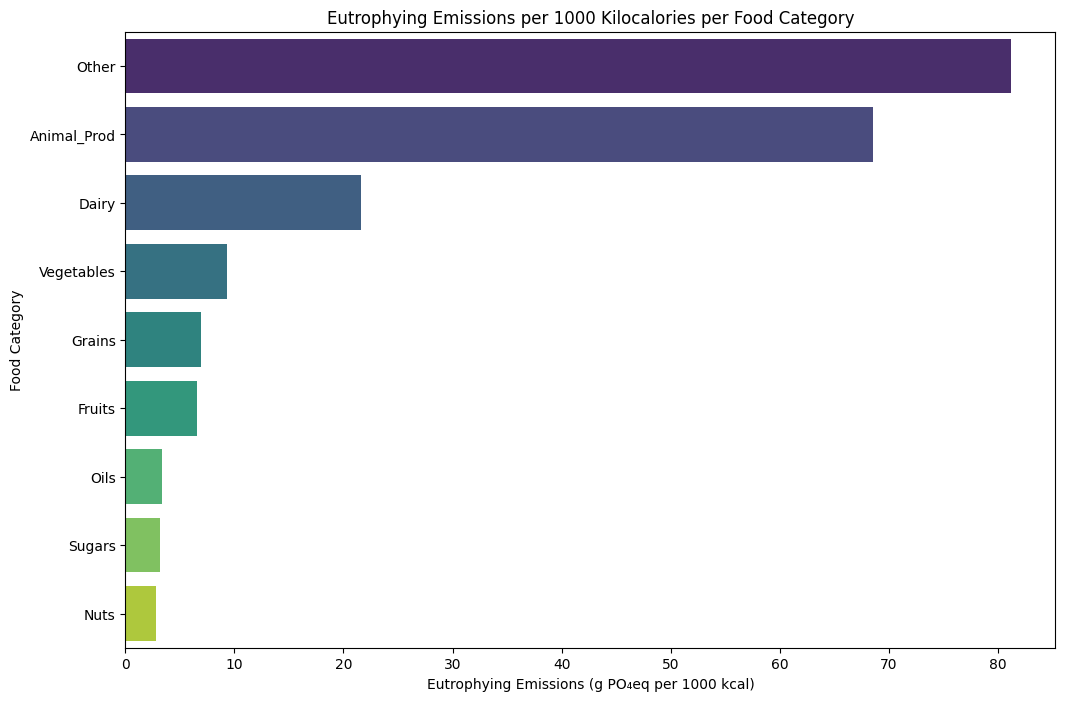

In [ ]:
# Correct column name for eutrophying emissions per 1000 kcal
correct_column_name = 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per 1000 Kilocalories per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per 1000 kcal)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_382/2063174780.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




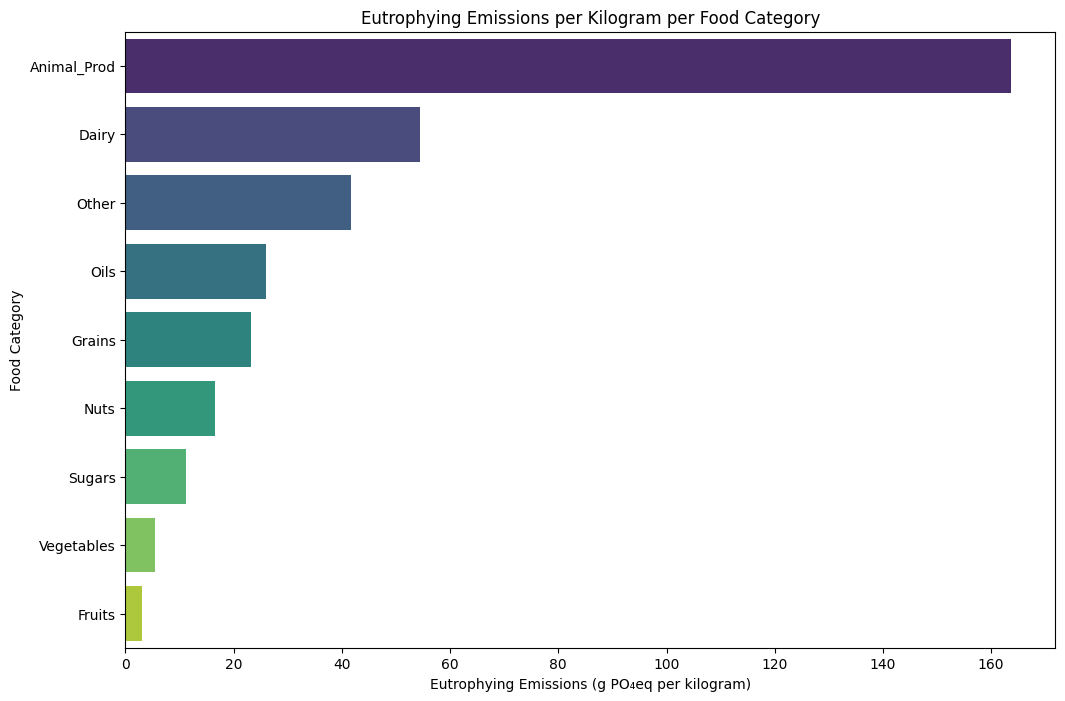

In [ ]:
# Correct column name for eutrophying emissions per kilogram
correct_column_name = 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per Kilogram per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_382/2063174780.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




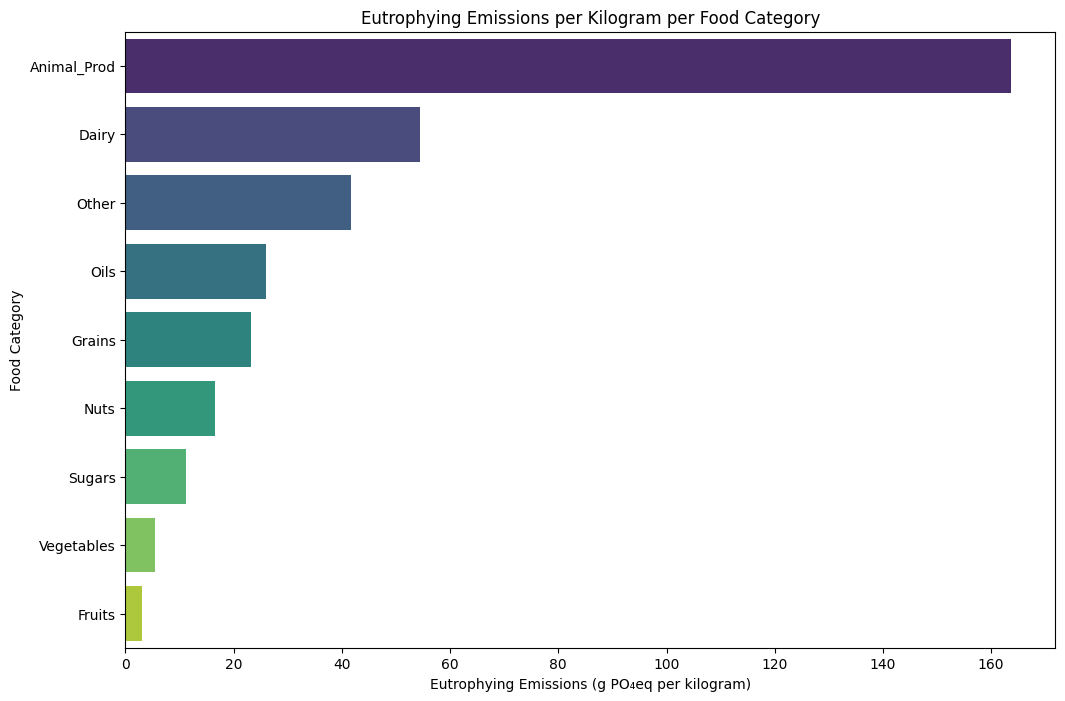

In [ ]:
# Correct column name for eutrophying emissions per kilogram
correct_column_name = 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per Kilogram per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_382/1873240895.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




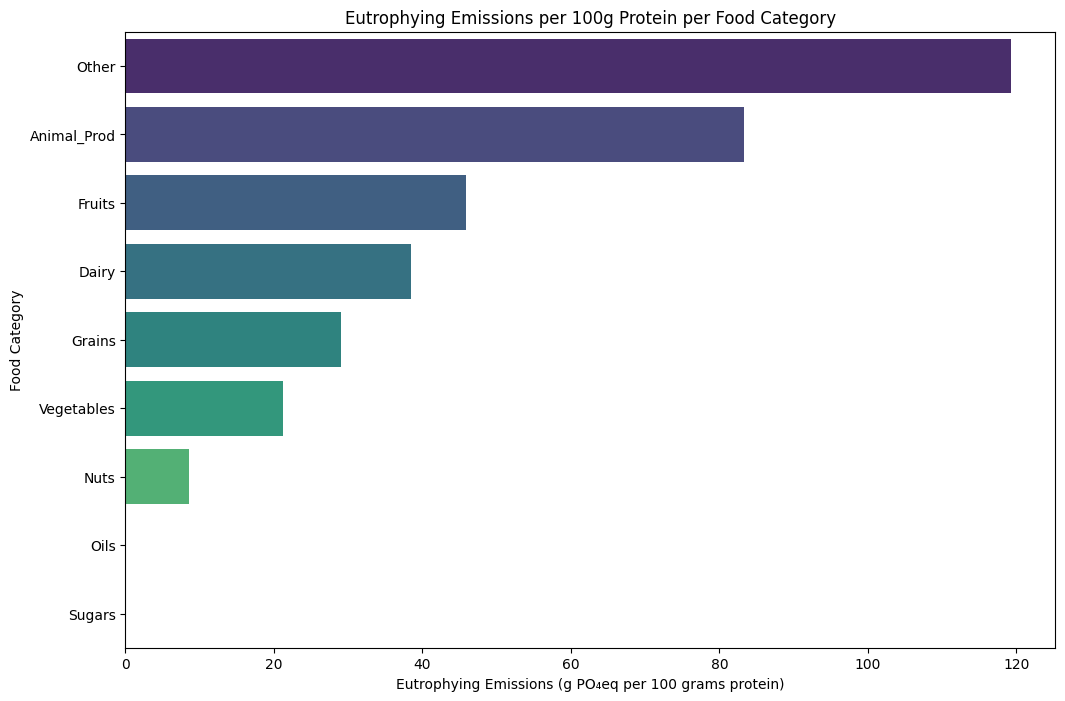

In [ ]:
# Correct column name for eutrophying emissions per 100g protein
correct_column_name = 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per 100g Protein per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per 100 grams protein)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/2898246074.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




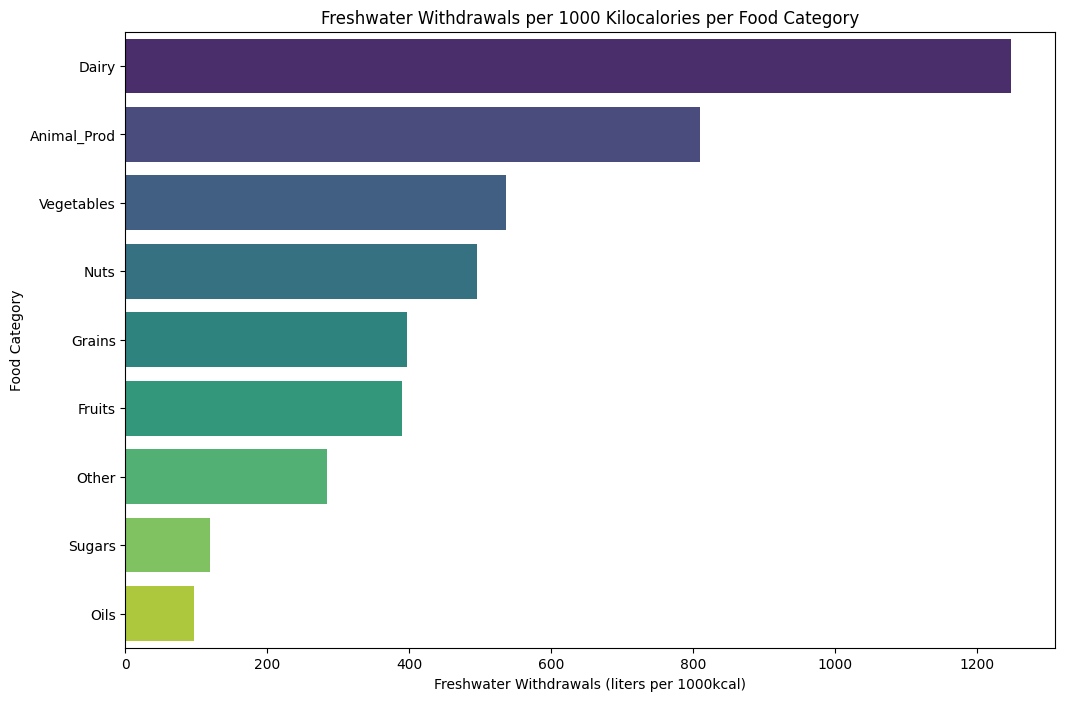

In [ ]:
# Correct column name for freshwater withdrawals per 1000 kcal
correct_column_name = 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per 1000 Kilocalories per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per 1000kcal)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/1453196905.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




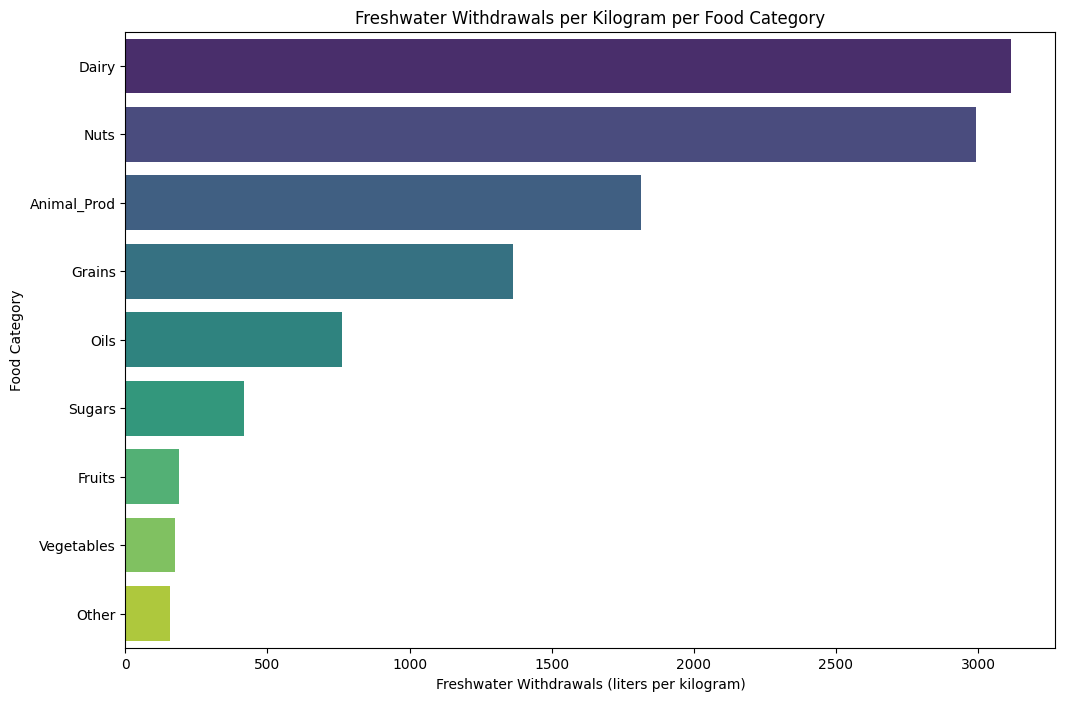

In [ ]:
# Correct column name for freshwater withdrawals per kilogram
correct_column_name = 'Freshwater withdrawals per kilogram (liters per kilogram)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per Kilogram per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per kilogram)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/1194614196.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




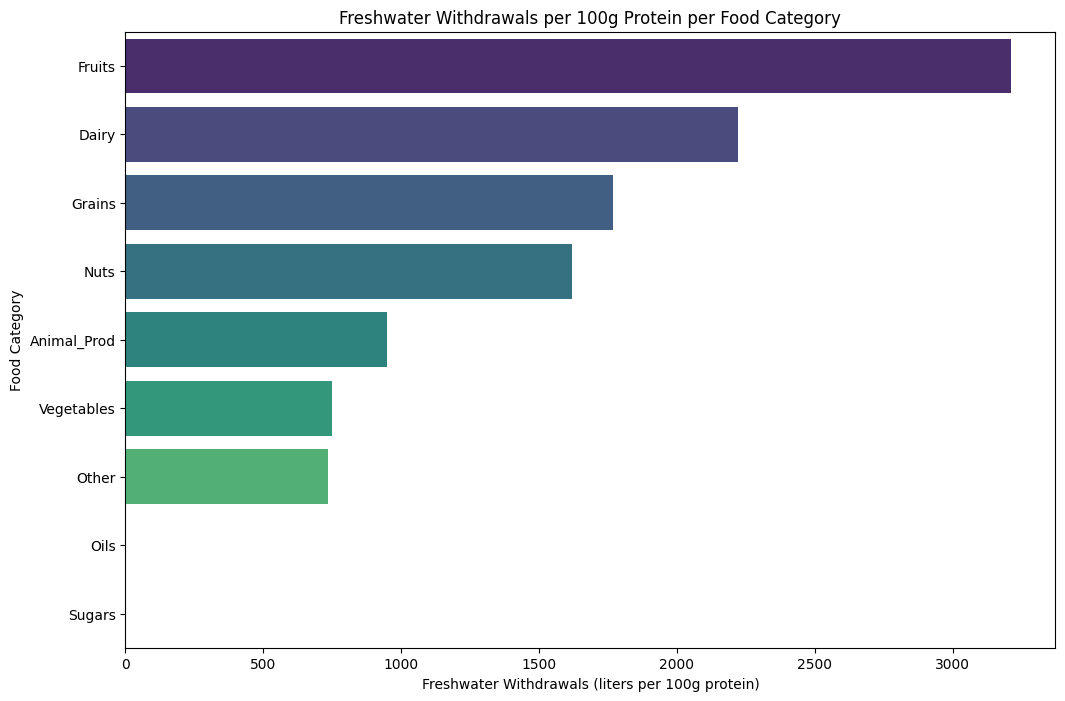

In [ ]:
# Correct column name for freshwater withdrawals per 100g protein
correct_column_name = 'Freshwater withdrawals per 100g protein (liters per 100g protein)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per 100g Protein per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per 100g protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_382/3070400565.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




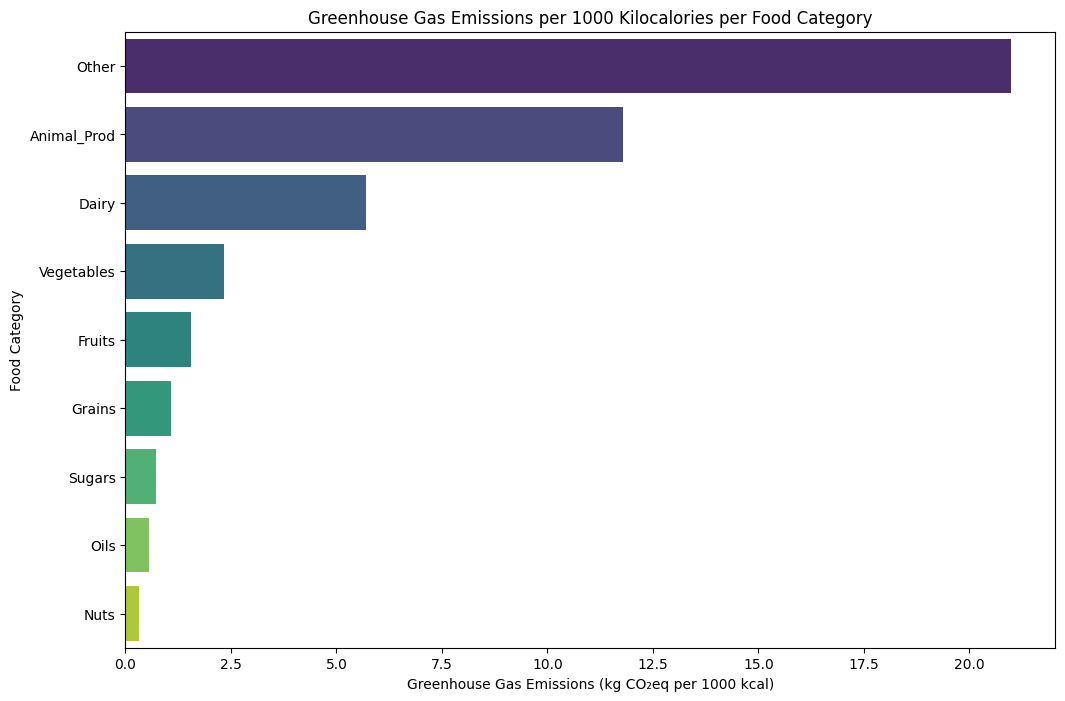

In [ ]:
# Correct column name for greenhouse gas emissions per 1000 kcal
correct_column_name = 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'

# Aggregate greenhouse gas emissions by category
category_ghg_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_ghg_emissions = category_ghg_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot greenhouse gas emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Greenhouse Gas Emissions per 1000 Kilocalories per Food Category')
plt.xlabel('Greenhouse Gas Emissions (kg CO₂eq per 1000 kcal)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/1855266187.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




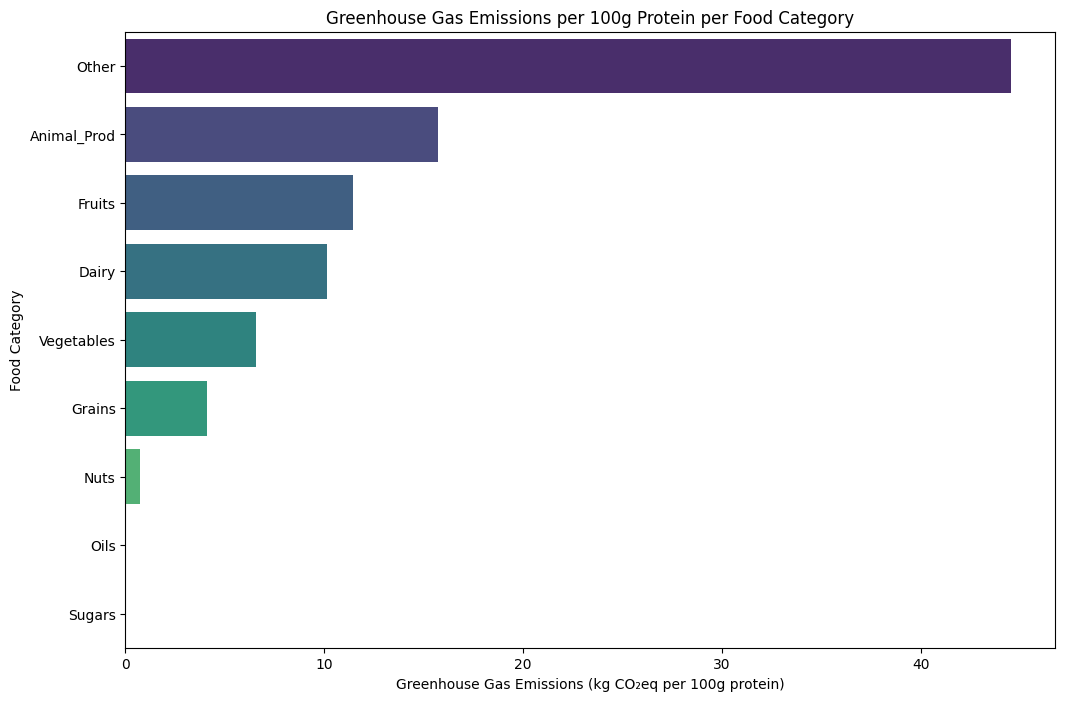

In [ ]:
# Correct column name for greenhouse gas emissions per 100g protein
correct_column_name = 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'

# Aggregate greenhouse gas emissions by category
category_ghg_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_ghg_emissions = category_ghg_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot greenhouse gas emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Greenhouse Gas Emissions per 100g Protein per Food Category')
plt.xlabel('Greenhouse Gas Emissions (kg CO₂eq per 100g protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_382/1232645114.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




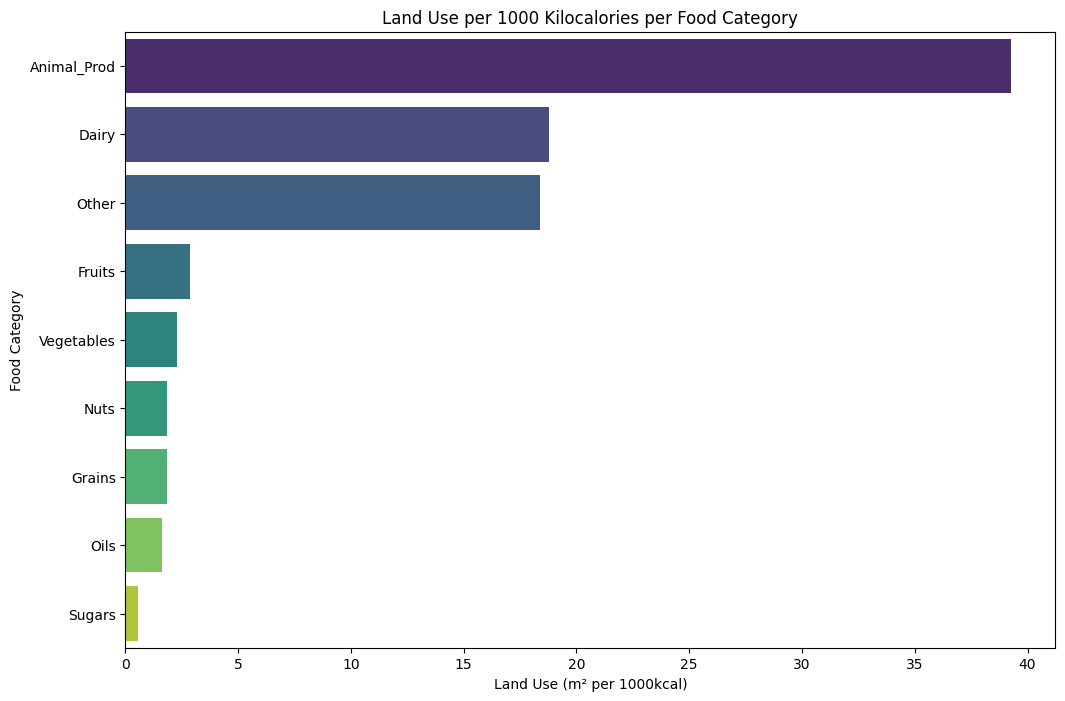

In [ ]:
# Correct column name for land use per 1000 kcal
correct_column_name = 'Land use per 1000kcal (m² per 1000kcal)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per 1000 Kilocalories per Food Category')
plt.xlabel('Land Use (m² per 1000kcal)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/2849784924.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




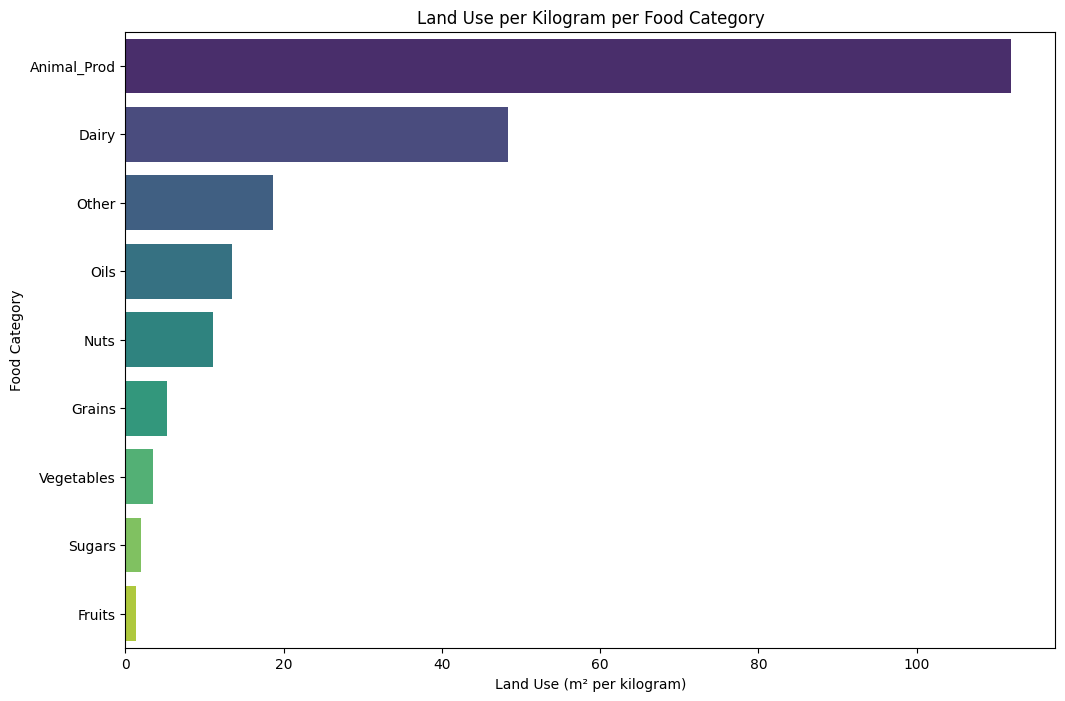

In [ ]:
# Correct column name for land use per kilogram
correct_column_name = 'Land use per kilogram (m² per kilogram)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per Kilogram per Food Category')
plt.xlabel('Land Use (m² per kilogram)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/1010921076.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




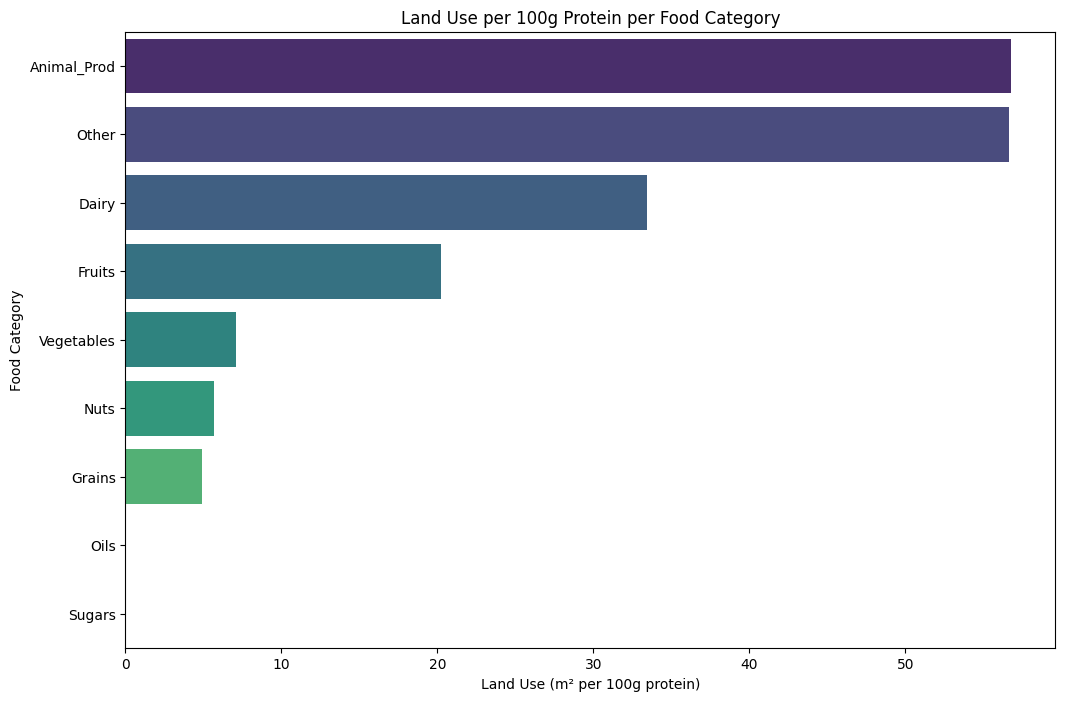

In [ ]:
# Correct column name for land use per 100g protein
correct_column_name = 'Land use per 100g protein (m² per 100g protein)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per 100g Protein per Food Category')
plt.xlabel('Land Use (m² per 100g protein)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/3589321874.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




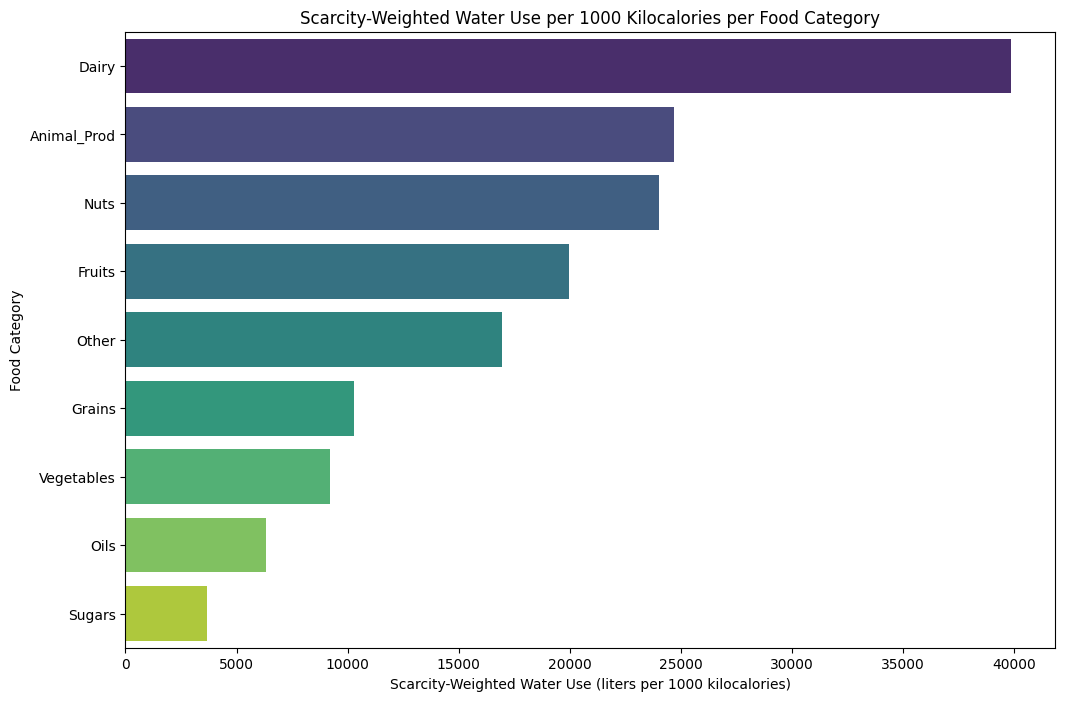

In [ ]:
# Correct column name for scarcity-weighted water use per 1000 kcal
correct_column_name = 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per 1000 Kilocalories per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per 1000 kilocalories)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/1258580619.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




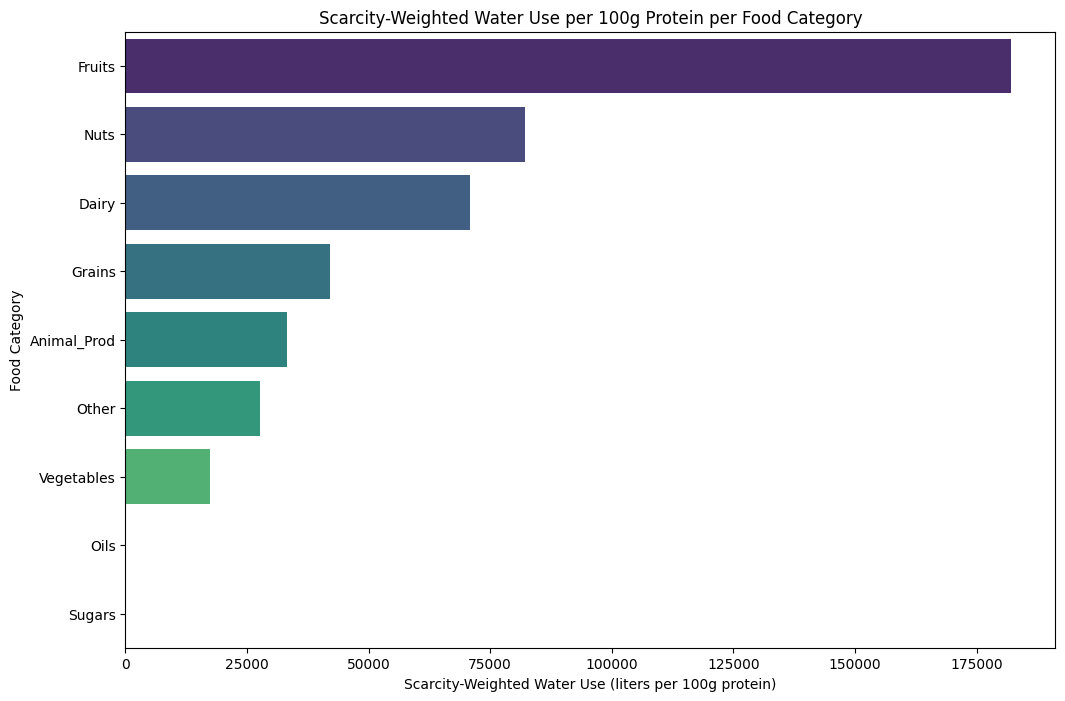

In [ ]:
# Load data
food_production_data = pd.read_csv('Food_Production.csv')


# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for scarcity-weighted water use per 100g protein
correct_column_name = 'Scarcity-weighted water use per 100g protein (liters per 100g protein)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per 100g Protein per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per 100g protein)')
plt.ylabel('Food Category')
plt.show()

/tmp/ipykernel_382/2177559451.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




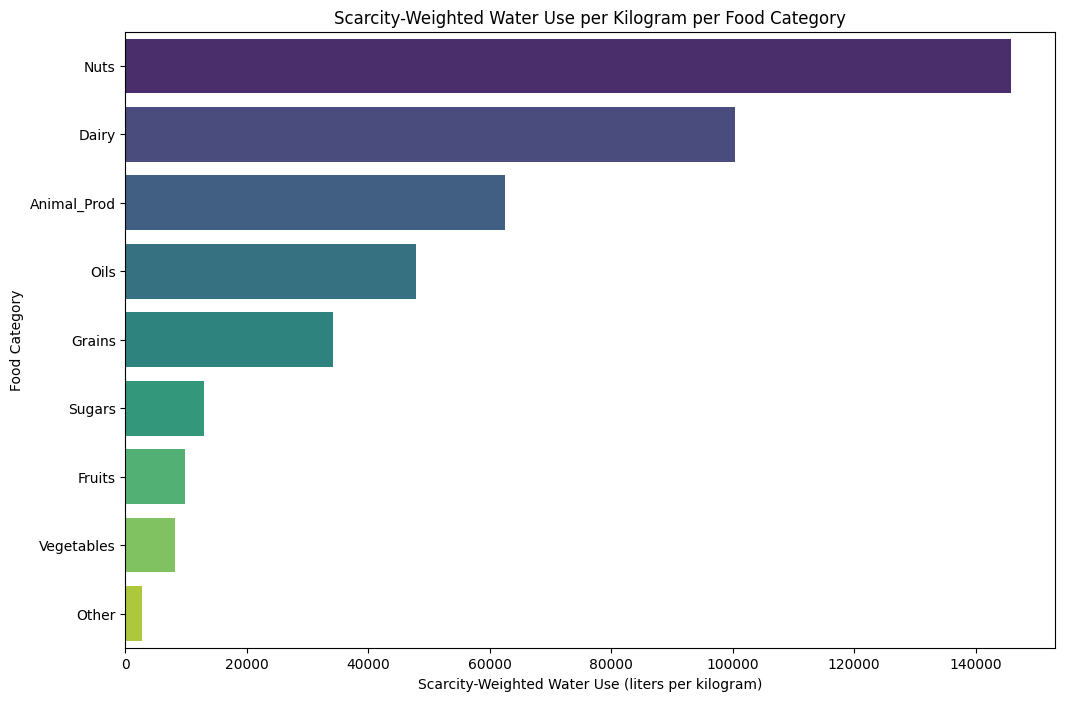

In [ ]:
# Correct column name for scarcity-weighted water use per kilogram
correct_column_name = 'Scarcity-weighted water use per kilogram (liters per kilogram)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per Kilogram per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per kilogram)')
plt.ylabel('Food Category')
plt.show()

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'EutrophyingEmissions_per_1000kcal', 'EutrophyingEmissions_per_kg',
       'EutrophyingEmissions_per_100g_protein',
       'FreshwaterWithdrawals_per_1000kcal',
       'FreshwaterWithdrawals_per_100g_protein',
       'FreshwaterWithdrawals_per_kg', 'GreenhouseGasEmissions_per_1000kcal',
       'GreenhouseGasEmissions_per_100g_protein', 'LandUse_per_1000kcal',
       'LandUse_per_kg', 'LandUse_per_100g_protein',
       'ScarcityWeightedWaterUse_per_kg',
       'ScarcityWeightedWaterUse_per_100g_protein',
       'ScarcityWeightedWaterUse_per_1000kcal', 'Category'],
      dtype='object')


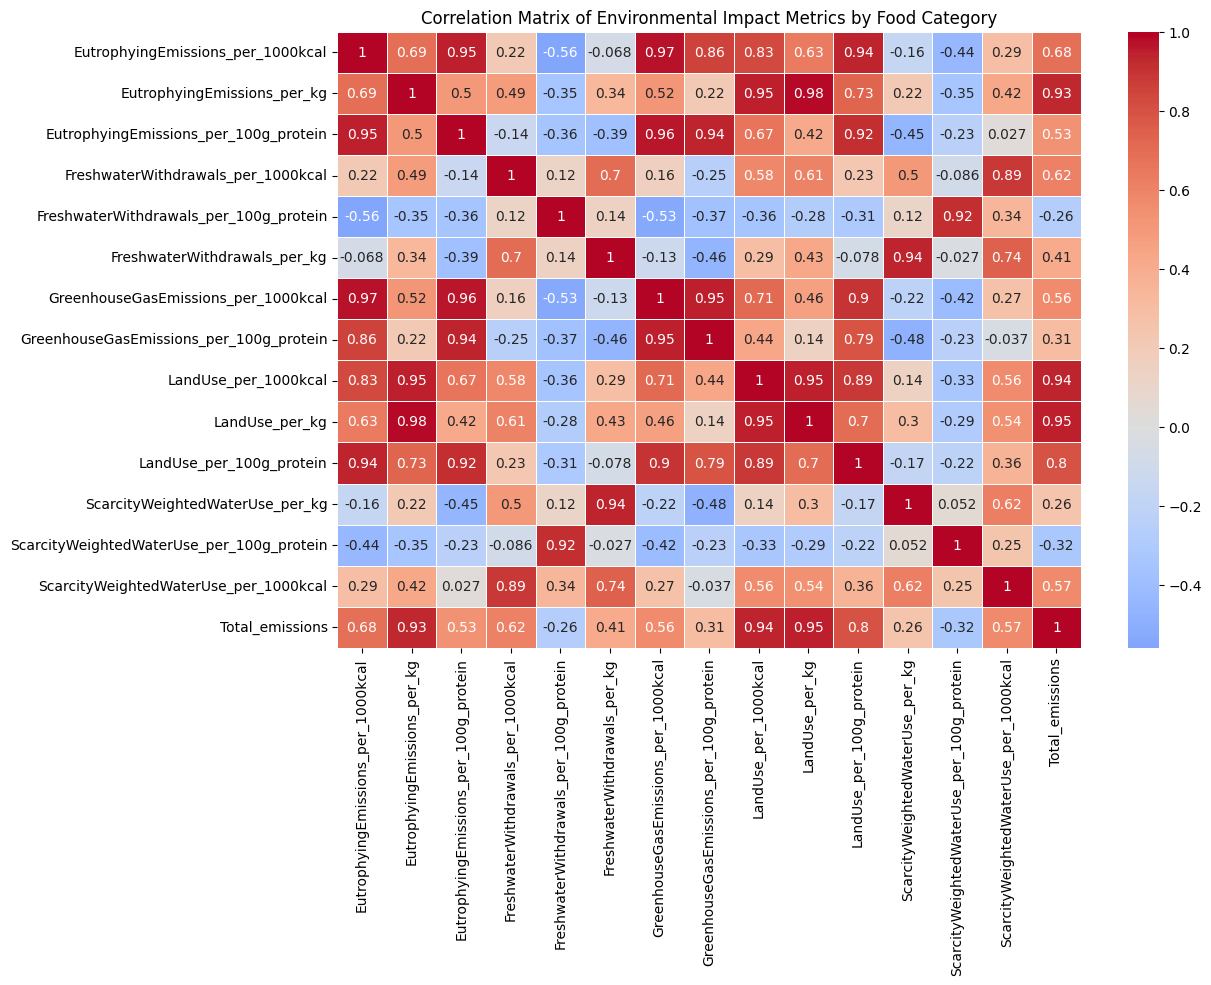

In [ ]:

# baidu.com and chatgpt 
# Load data
# Correct column names for consistency
#food_production_data= food_production.copy()
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_per_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_per_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_per_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_per_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_per_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_per_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_per_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_per_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_per_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_per_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_per_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_per_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_per_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_per_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_per_1000kcal",
    "EutrophyingEmissions_per_kg",
    "EutrophyingEmissions_per_100g_protein",
    "FreshwaterWithdrawals_per_1000kcal",
    "FreshwaterWithdrawals_per_100g_protein",
    "FreshwaterWithdrawals_per_kg",
    "GreenhouseGasEmissions_per_1000kcal",
    "GreenhouseGasEmissions_per_100g_protein",
    "LandUse_per_1000kcal",
    "LandUse_per_kg",
    "LandUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_kg",
    "ScarcityWeightedWaterUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_1000kcal",
    "Total_emissions"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Verify the column names after renaming
print(food_production_data.columns)

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Compute correlation matrix
correlation_matrix = category_data[cols_to_convert].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Environmental Impact Metrics by Food Category')
plt.show()

In [ ]:
food_production_data

Food product  Land use change  Animal Feed  Farm  Processing  \
0   Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1          Maize (Meal)              0.3          0.0   0.5         0.1   
2         Barley (Beer)              0.0          0.0   0.2         0.1   
3               Oatmeal              0.0          0.0   1.4         0.0   
4                  Rice              0.0          0.0   3.6         0.1   
5              Potatoes              0.0          0.0   0.2         0.0   
6               Cassava              0.6          0.0   0.2         0.0   
7            Cane Sugar              1.2          0.0   0.5         0.0   
8            Beet Sugar              0.0          0.0   0.5         0.2   
9          Other Pulses              0.0          0.0   1.1         0.0   
10                 Peas              0.0          0.0   0.7         0.0   
11                 Nuts             -2.1          0.0   2.1         0.0   
12           Groundnuts              0.4          0.0   1.4         0.4   
13              Soymilk              0.2          0.0   0.1         0.2   
14                 Tofu              1.0          0.0   0.5         0.8   
15          Soybean Oil              3.1          0.0   1.5         0.3   
16             Palm Oil              3.1          0.0   2.1         1.3   
17        Sunflower Oil              0.1          0.0   2.1         0.2   
18         Rapeseed Oil              0.2          0.0   2.3         0.2   
19            Olive Oil             -0.4          0.0   4.3         0.7   
20             Tomatoes              0.4          0.0   0.7         0.0   
21       Onions & Leeks              0.0          0.0   0.2         0.0   
22      Root Vegetables              0.0          0.0   0.2         0.0   
23            Brassicas              0.0          0.0   0.3         0.0   
24     Other Vegetables              0.0          0.0   0.2         0.1   
25         Citrus Fruit             -0.1          0.0   0.3         0.0   
26              Bananas              0.0          0.0   0.3         0.1   
27               Apples              0.0          0.0   0.2         0.0   
28     Berries & Grapes              0.0          0.0   0.7         0.0   
29                 Wine             -0.1          0.0   0.6         0.1   
30          Other Fruit              0.1          0.0   0.4         0.0   
31               Coffee              3.7          0.0  10.4         0.6   
32       Dark Chocolate             14.3          0.0   3.7         0.2   
33     Beef (beef herd)             16.3          1.9  39.4         1.3   
34    Beef (dairy herd)              0.9          2.5  15.7         1.1   
35        Lamb & Mutton              0.5          2.4  19.5         1.1   
36             Pig Meat              1.5          2.9   1.7         0.3   
37         Poultry Meat              2.5          1.8   0.7         0.4   
38                 Milk              0.5          0.2   1.5         0.1   
39               Cheese              4.5          2.3  13.1         0.7   
40                 Eggs              0.7          2.2   1.3         0.0   
41        Fish (farmed)              0.5          0.8   3.6         0.0   
42     Shrimps (farmed)              0.2          2.5   8.4         0.0   

    Transport  Packging  Retail  Total_emissions  \
0         0.1       0.1     0.1              1.4   
1         0.1       0.1     0.0              1.1   
2         0.0       0.5     0.3              1.1   
3         0.1       0.1     0.0              1.6   
4         0.1       0.1     0.1              4.0   
5         0.1       0.0     0.0              0.3   
6         0.1       0.0     0.0              0.9   
7         0.8       0.1     0.0              2.6   
8         0.6       0.1     0.0              1.4   
9         0.1       0.4     0.0              1.6   
10        0.1       0.0     0.0              0.8   
11        0.1       0.1     0.0              0.2   
12        0.1       0.1     0.0   

In [ ]:
# loop and rmsle taken from assignment 3 on course Project Big Data

# Prepare data
model_df = food_production.copy()
model_df = model_df.fillna(0)
model_df = model_df.set_index('Food product')

# Set up train and test data
X = model_df.loc[:,"Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)":]
y = model_df["Total_emissions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate models
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators = 100, random_state=42),
    "Ab_Regressor": AdaBoostRegressor(n_estimators = 100, random_state=42),
    "LinearRegression": LinearRegression(),
}

# Initiate results
results = {}

# Calculate Root Mean Squared Error
def rmse(actual, predicted):

    actual = np.array(actual)
    predicted = np.array(predicted)

    squared_diff = np.square(actual - predicted)
    mean_squared_diff = np.mean(squared_diff)

    return np.sqrt(mean_squared_diff)

# Loop models
for model_name, model in models.items():
    model.fit(X, y)
    t0 = time.perf_counter()
    predicted = model.predict(X_test)
    t1 = time.perf_counter()
    print(f"Your model {model_name} took {t1-t0:.4} seconds to be trained.")

    result = rmse(y_test, predicted)
    print(f"RMSE on public test set:, {result} \n")

    results[model_name] = result







results_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE'])

fig = px.bar(results_df, x='RMSE', y=results_df.index, orientation='h', title='Models RMSE log')
fig.show()



Your model RandomForestRegressor took 0.00987 seconds to be trained.
RMSE on public test set:, 1.7542099308307142 

Your model Ab_Regressor took 0.01567 seconds to be trained.
RMSE on public test set:, 2.593246531622423 

Your model LinearRegression took 0.000932 seconds to be trained.
RMSE on public test set:, 2.9868179694141066 



### Hyperparameter Optimization for Random Forest Regression

In [ ]:
food_production_data["Food product"] = food_production_data["Food product"].replace(mapping_dict)


X = food_production_data.drop(['Total_emissions', 'Food product', 'Category'], axis=1)
y = food_production_data['Total_emissions']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

""" Grid Search Approach is taken from ChatGpt
"""
# Hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Optimized RandomForest RMSE: {rmse}')
print(f'Optimized RandomForest R^2: {r2}')
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END m

In [ ]:
food_production_data

Food product  Land use change  Animal Feed  Farm  \
0                Wheat and products              0.1          0.0   0.8   
1                Maize and products              0.3          0.0   0.5   
2               Barley and products              0.0          0.0   0.2   
3                              Oats              0.0          0.0   1.4   
4          Rice (Milled Equivalent)              0.0          0.0   3.6   
5             Potatoes and products              0.0          0.0   0.2   
6              Cassava and products              0.6          0.0   0.2   
7                        Sugar cane              1.2          0.0   0.5   
8                        Sugar beet              0.0          0.0   0.5   
9        Pulses, Other and products              0.0          0.0   1.1   
10                             Peas              0.0          0.0   0.7   
11                Nuts and products             -2.1          0.0   2.1   
12          Groundnuts (Shelled Eq)              0.4          0.0   1.4   
13                          Soymilk              0.2          0.0   0.1   
14                        Soyabeans              1.0          0.0   0.5   
15                     Soyabean Oil              3.1          0.0   1.5   
16                         Palm Oil              3.1          0.0   2.1   
17                Sunflowerseed Oil              0.1          0.0   2.1   
18             Rape and Mustard Oil              0.2          0.0   2.3   
19                        Olive Oil             -0.4          0.0   4.3   
20            Tomatoes and products              0.4          0.0   0.7   
21                           Onions              0.0          0.0   0.2   
22                     Roots, Other              0.0          0.0   0.2   
23                        Brassicas              0.0          0.0   0.3   
24                Vegetables, Other              0.0          0.0   0.2   
25              Oranges, Mandarines             -0.1          0.0   0.3   
26                          Bananas              0.0          0.0   0.3   
27              Apples and products              0.0          0.0   0.2   
28  Grapes and products (excl wine)              0.0          0.0   0.7   
29                             Wine             -0.1          0.0   0.6   
30                    Fruits, Other              0.1          0.0   0.4   
31              Coffee and products              3.7          0.0  10.4   
32         Cocoa Beans and products             14.3          0.0   3.7   
33                      Bovine Meat             16.3          1.9  39.4   
34                      Bovine Meat              0.9          2.5  15.7   
35               Mutton & Goat Meat              0.5          2.4  19.5   
36                          Pigmeat              1.5          2.9   1.7   
37                     Poultry Meat              2.5          1.8   0.7   
38          Milk - Excluding Butter              0.5          0.2   1.5   
39                            Cream              4.5          2.3  13.1   
40                             Eggs              0.7          2.2   1.3   
41                  Freshwater Fish              0.5          0.8   3.6   
42                      Crustaceans              0.2          2.5   8.4   

    Processing  Transport  Packging  Retail  Total_emissions  \
0          0.2        0.1       0.1     0.1              1.4   
1          0.1        0.1       0.1     0.0              1.1   
2          0.1        0.0       0.5     0.3              1.1   
3          0.0        0.1       0.1     0.0              1.6   
4          0.1        0.1       0.1     0.1              4.0   
5          0.0        0.1       0.0     0.0              0.3   
6          0.0        0.1       0.0     0.0              0.9   
7          0.0        0.8       0.1     0.0              2.6   
8          0.2        0.6       0.1     0.0              1.4   
9          0.0        0.1       0.4     0.0              1.6   
10         0.0    

### RESULT ANALYSIS OF PREDICTION MODEL

In [ ]:
features = food_production_data[[ 
    "EutrophyingEmissions_per_1000kcal",
    "EutrophyingEmissions_per_kg",
    "FreshwaterWithdrawals_per_1000kcal",
    "FreshwaterWithdrawals_per_100g_protein",
    "FreshwaterWithdrawals_per_kg",
    "GreenhouseGasEmissions_per_1000kcal",
    "GreenhouseGasEmissions_per_100g_protein",
    "LandUse_per_1000kcal",
    "LandUse_per_kg",
    "LandUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_kg",
    "ScarcityWeightedWaterUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_1000kcal"]]

target = food_production_data['Total_emissions']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Feature importances
feature_importances = rf_regressor.feature_importances_
labels = features.columns

# Creating a DataFrame for easier handling
importances_df = pd.DataFrame({
    'Features': labels,
    'Importances': feature_importances
})

# Sorting the DataFrame to get the top 5 features
top_5_features = importances_df.sort_values(by='Importances', ascending=False).head(5)

fig = px.bar(top_5_features, y='Features', x='Importances', 
             orientation='h', 
             color='Importances',  
             color_continuous_scale='Blues') 

fig.update_layout(
    title='Top 5 Feature Importances in Random Forest Model',
    xaxis_title='Importance',
    yaxis_title='Features',
    yaxis={'categoryorder':'total ascending'},  
    coloraxis_showscale=False,  
)

fig.show()

/root/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/root/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/root/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/root/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/root/venv/lib/python3.9

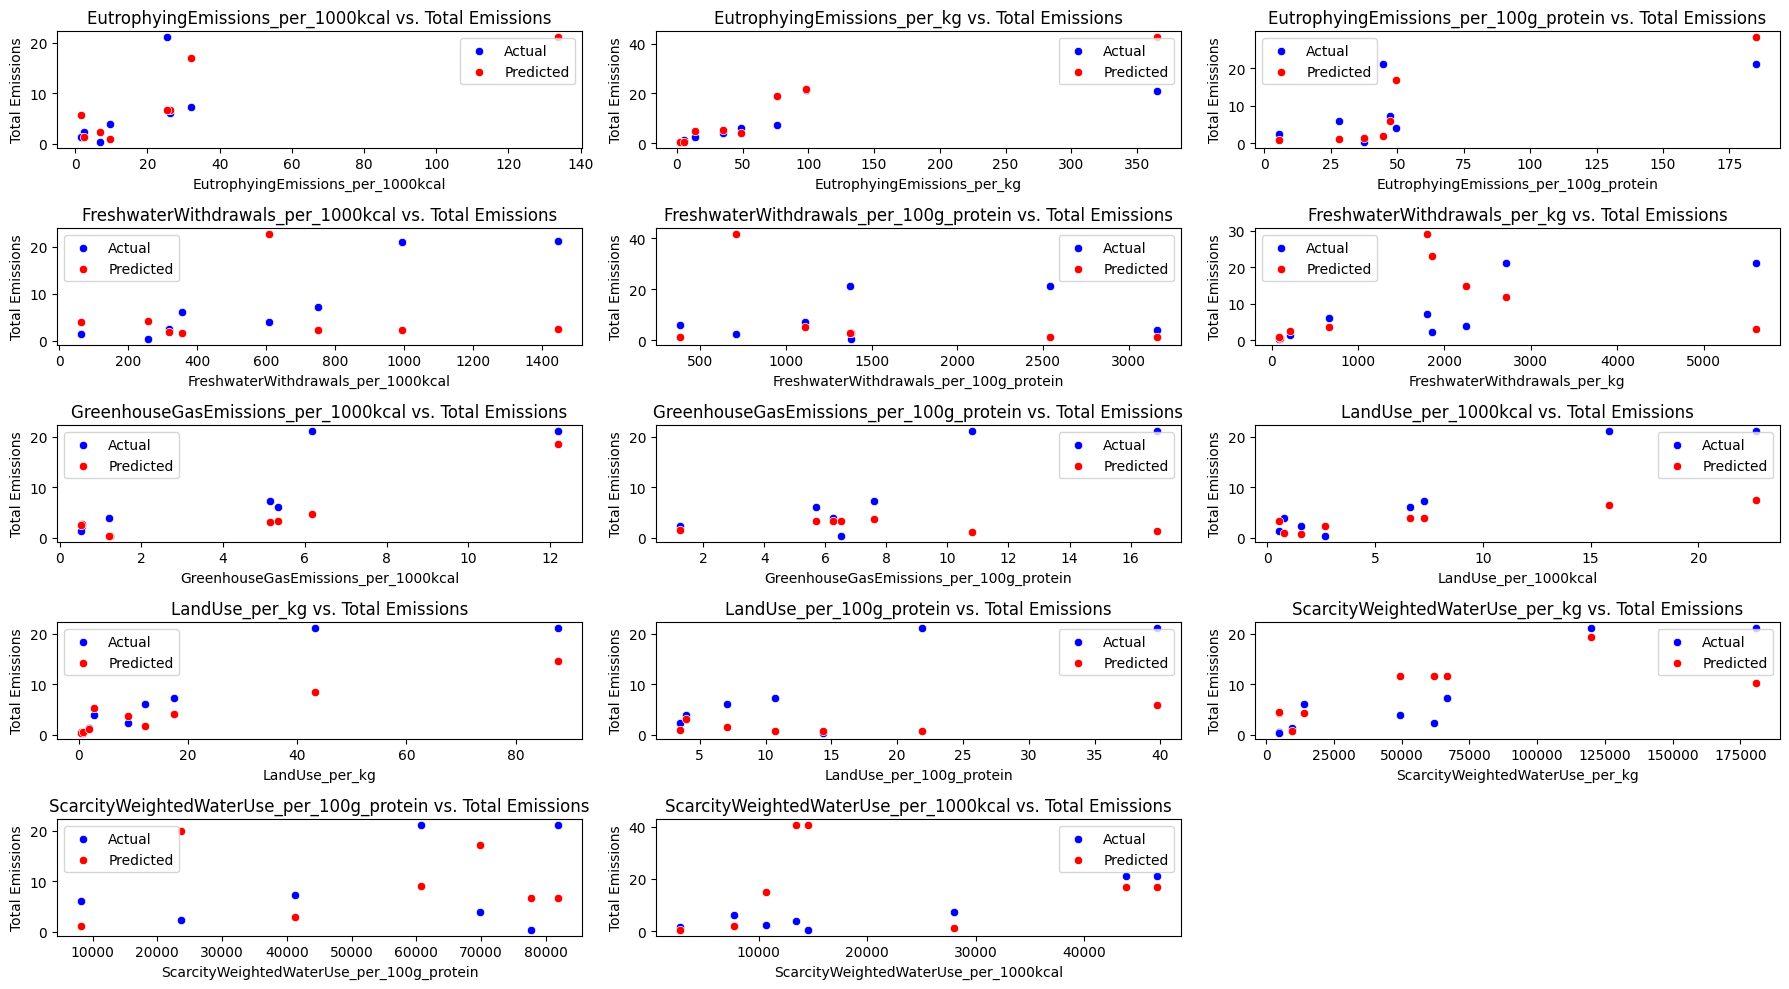

Variable: EutrophyingEmissions_per_1000kcal, RMSE: 6.200, R^2: 0.371
Variable: EutrophyingEmissions_per_kg, RMSE: 8.318, R^2: -0.132
Variable: EutrophyingEmissions_per_100g_protein, RMSE: 8.376, R^2: -0.148
Variable: FreshwaterWithdrawals_per_1000kcal, RMSE: 11.220, R^2: -1.061
Variable: FreshwaterWithdrawals_per_100g_protein, RMSE: 16.163, R^2: -3.277
Variable: FreshwaterWithdrawals_per_kg, RMSE: 12.716, R^2: -1.647
Variable: GreenhouseGasEmissions_per_1000kcal, RMSE: 5.971, R^2: 0.416
Variable: GreenhouseGasEmissions_per_100g_protein, RMSE: 9.617, R^2: -0.514
Variable: LandUse_per_1000kcal, RMSE: 7.034, R^2: 0.190
Variable: LandUse_per_kg, RMSE: 5.114, R^2: 0.572
Variable: LandUse_per_100g_protein, RMSE: 8.971, R^2: -0.317
Variable: ScarcityWeightedWaterUse_per_kg, RMSE: 5.991, R^2: 0.413
Variable: ScarcityWeightedWaterUse_per_100g_protein, RMSE: 10.156, R^2: -0.689
Variable: ScarcityWeightedWaterUse_per_1000kcal, RMSE: 19.007, R^2: -4.914


In [ ]:
independent_vars = [
     "EutrophyingEmissions_per_1000kcal",
    "EutrophyingEmissions_per_kg",
    "EutrophyingEmissions_per_100g_protein",
    "FreshwaterWithdrawals_per_1000kcal",
    "FreshwaterWithdrawals_per_100g_protein",
    "FreshwaterWithdrawals_per_kg",
    "GreenhouseGasEmissions_per_1000kcal",
    "GreenhouseGasEmissions_per_100g_protein",
    "LandUse_per_1000kcal",
    "LandUse_per_kg",
    "LandUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_kg",
    "ScarcityWeightedWaterUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_1000kcal"
]

plt.figure(figsize=(18, 10))


performance_metrics = []

for i, var in enumerate(independent_vars):
    X = food_production_data[[var]]  # X needs to be a dataframe
    y = food_production_data['Total_emissions']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)



    rf = RandomForestRegressor(n_estimators=200,max_depth= None, min_samples_leaf= 1, min_samples_split= 2,random_state=42)

    rf.fit(X_train_scaled, y_train)

    y_pred = rf.predict(X_test_scaled)

    plt.subplot((len(independent_vars) + 2) // 3, 3, i + 1)
    sns.scatterplot(x=X_test[var], y=y_test, color="blue", label="Actual")
    sns.scatterplot(x=X_test[var], y=y_pred, color="red", label="Predicted")
    plt.title(f'{var} vs. Total Emissions')
    plt.xlabel(var)
    plt.ylabel('Total Emissions')
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    performance_metrics.append((var, rmse, r2))

plt.tight_layout()
plt.show()
# Display performance metrics
for var, rmse, r2 in performance_metrics:
    print(f"Variable: {var}, RMSE: {rmse:.3f}, R^2: {r2:.3f}")

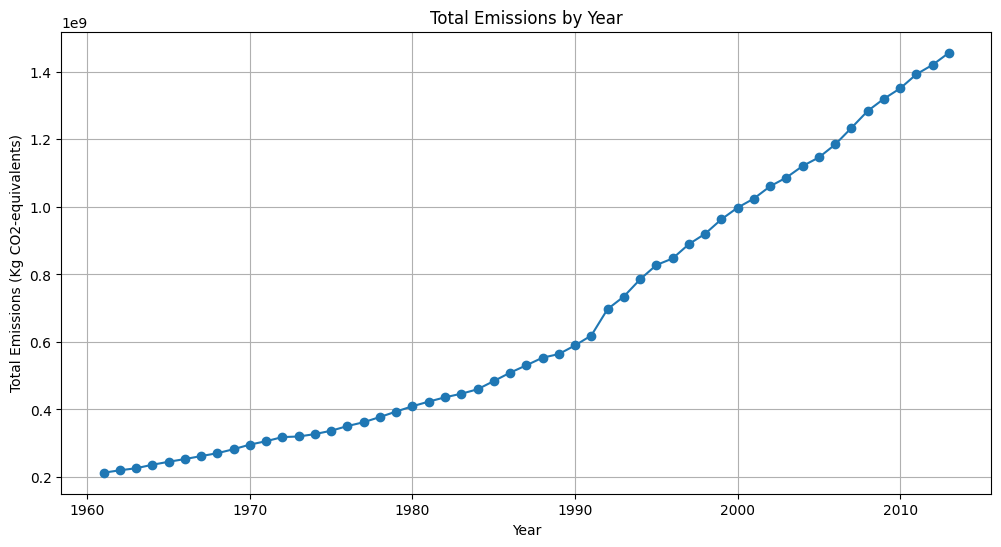

In [ ]:
fao_filtered = fao[fao['Element'] == 'Food']
reshaped_fao = fao_filtered.melt(id_vars=['Area', 'Item', 'Element', 'Unit'], 
                                           value_vars=[col for col in fao_filtered.columns if col.startswith('Y')],
                                           var_name='Year', 
                                           value_name='Production')

# Convert the 'Year' column to integer
reshaped_fao['Year'] = reshaped_fao['Year'].str.extract('(\d+)').astype(int)
merged_data = pd.merge(reshaped_fao, 
                       food_production, 
                       left_on='Item', 
                       right_on='Food product', 
                       how='inner')
merged_data['Total_Emissions'] = merged_data['Production']*1000 * merged_data['Total_emissions']

# Group by year and calculate the total emissions for each year
total_emissions_by_year = merged_data.groupby('Year')['Total_Emissions'].sum().reset_index()

# Print the result
plt.figure(figsize=(12, 6))
plt.plot(total_emissions_by_year['Year'], total_emissions_by_year['Total_Emissions'], marker='o')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Kg CO2-equivalents)')
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1addba0-7fdd-45b7-963a-cfc89fb50200' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>